In [14]:
import pandas as pd
import numpy as np

# -------------------------------
# Parameters
# -------------------------------
num_train_patients = 500
num_test_patients = 200
min_days = 30
max_days = 180
features = ["Age", "BMI", "HbA1c", "Blood_Pressure_Sys", "Blood_Pressure_Dia",
            "Glucose_Level", "Cholesterol", "Medication_Adherence",
            "Exercise_Minutes_Per_Week", "Diet_Score", "Sleep_Hours"]

# -------------------------------
# Function to generate patient time-series
# -------------------------------
def generate_patient_data(pid):
    num_days = np.random.randint(min_days, max_days + 1)
    data = {
        "Patient_ID": [pid]*num_days,
        "Age": np.random.randint(30, 80, num_days),
        "BMI": np.round(np.random.uniform(18, 40, num_days), 1),
        "HbA1c": np.round(np.random.uniform(5, 12, num_days), 1),
        "Blood_Pressure_Sys": np.random.randint(100, 180, num_days),
        "Blood_Pressure_Dia": np.random.randint(60, 110, num_days),
        "Glucose_Level": np.random.randint(70, 250, num_days),
        "Cholesterol": np.random.randint(150, 300, num_days),
        "Medication_Adherence": np.round(np.random.uniform(50, 100, num_days),1),
        "Exercise_Minutes_Per_Week": np.random.randint(0, 300, num_days),
        "Diet_Score": np.round(np.random.uniform(0, 10, num_days),1),
        "Sleep_Hours": np.round(np.random.uniform(4, 10, num_days),1),
    }
    df = pd.DataFrame(data)

    # Deterioration probability calculation (adjusted weights and added non-linearity/randomness)
    linear_combination = (0.4*df["HbA1c"] + 0.25*df["BMI"] + 0.15*df["Blood_Pressure_Sys"] +
                          0.1*(100-df["Medication_Adherence"]) + 0.1*(10-df["Diet_Score"]) +
                          0.05*(200-df["Exercise_Minutes_Per_Week"]))

    # Apply a sigmoid-like transformation to spread out probabilities, centered around a value
    # and add some random noise
    centered_lc = linear_combination - np.mean(linear_combination) # Center around mean for transformation
    scaled_lc = centered_lc / np.std(linear_combination) if np.std(linear_combination) > 0 else centered_lc # Scale if standard deviation is not zero
    sigmoid_transformed = 100 / (1 + np.exp(-scaled_lc)) # Sigmoid-like transformation scaled to 0-100

    # Add some random noise to further spread the distribution
    noise = np.random.normal(0, 10, num_days) # Mean 0, standard deviation 10 noise
    prob = sigmoid_transformed + noise

    prob = np.clip(prob, 0, 100) # Clip to ensure probabilities are between 0 and 100

    df["Deterioration_Probability"] = prob
    return df

# -------------------------------
# Generate train dataset
# -------------------------------
train_data = pd.concat([generate_patient_data(pid) for pid in range(1, num_train_patients+1)], ignore_index=True)
test_data = pd.concat([generate_patient_data(pid) for pid in range(1, num_test_patients+1)], ignore_index=True)

# -------------------------------
# Save CSV files
# -------------------------------
train_data.to_csv("synth_train.csv", index=False)
test_data.to_csv("synth_test.csv", index=False)

print("Synthetic datasets generated:")
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

Synthetic datasets generated:
Train shape: (53554, 13)
Test shape: (20679, 13)


In [8]:
from google.colab import files

# Download the generated CSV files
files.download("synth_train.csv")
files.download("synth_test.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_6 (Masking)             │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 49.3386 - mae: 7.0044 - val_loss: 31.3382 - val_mae: 5.5818
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 25.0848 - mae: 4.9576 - val_loss: 11.4887 - val_mae: 3.3574
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 8.2368 - mae: 2.7799 - val_loss: 0.8049 - val_mae: 0.8070
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.3104 - mae: 0.4602 - val_loss: 0.3368 - val_mae: 0.5405
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.2907 - mae: 0.5012 - val_loss: 0.0858 - val_mae: 0.2354
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0424 - mae: 0.1689 - val_loss: 0.0564 - val_mae: 0.1655
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0357 - mae: 0.1525 - val_loss: 0.0427 - val_mae: 0.1320
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0222 - mae: 0.1166 - val_loss: 0.0361 - val_mae: 0.1130
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0

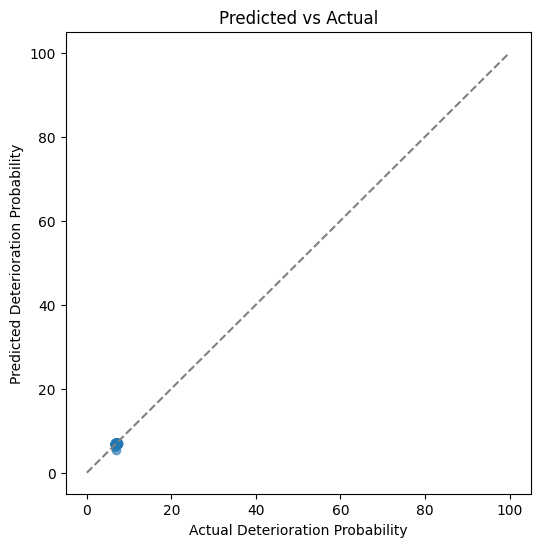

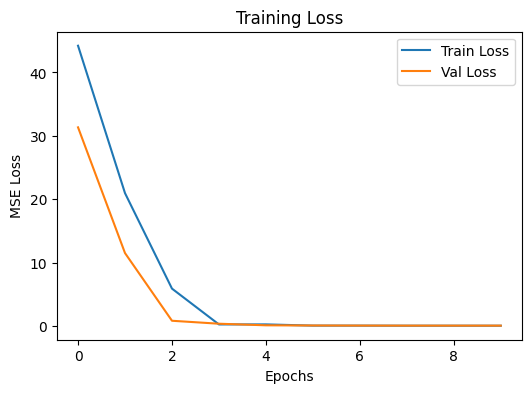

Binary Metrics (Threshold 50%): AUROC=nan, AUPRC=0.000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

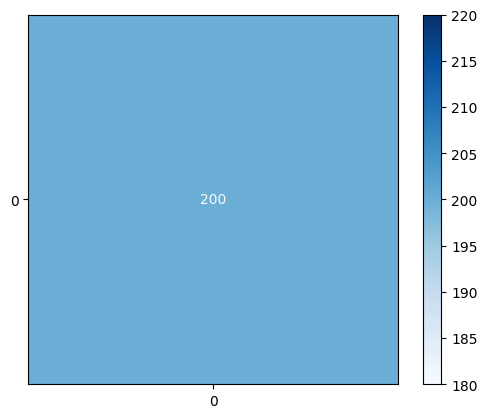

In [11]:
# ================================
# 1. Install dependencies
# ================================
!pip install scikit-learn matplotlib seaborn tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import calibration_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ================================
# 2. Load datasets
# ================================
train_df = pd.read_csv("synth_train.csv")
test_df = pd.read_csv("synth_test.csv")

features = ["Age", "BMI", "HbA1c", "Blood_Pressure_Sys", "Blood_Pressure_Dia",
            "Glucose_Level", "Cholesterol", "Medication_Adherence",
            "Exercise_Minutes_Per_Week", "Diet_Score", "Sleep_Hours"]

# ================================
# 3. Prepare sequences
# ================================
def prepare_sequences(df, features):
    sequences, labels = [], []
    for pid, group in df.groupby("Patient_ID"):
        seq = group[features].values
        label = group["Deterioration_Probability"].mean()  # continuous
        sequences.append(seq)
        labels.append(label)
    return sequences, np.array(labels)

train_seq, y_train = prepare_sequences(train_df, features)
test_seq, y_test = prepare_sequences(test_df, features)

X_train = pad_sequences(train_seq, dtype="float32", padding="post")
X_test = pad_sequences(test_seq, maxlen=X_train.shape[1], dtype="float32", padding="post")

# ================================
# 4. Build LSTM model
# ================================
model = Sequential([
    Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64),
    Dense(32, activation="relu"),
    Dense(1, activation="linear")
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.summary()

# ================================
# 5. Train
# ================================
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# ================================
# 6. Predict
# ================================
y_pred = model.predict(X_test).ravel()

# ================================
# 7. Regression metrics
# ================================
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Regression Metrics:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R2 Score: {r2:.3f}")

# ================================
# 8. Regression plots
# ================================
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0,100],[0,100],"--", color="gray")
plt.xlabel("Actual Deterioration Probability")
plt.ylabel("Predicted Deterioration Probability")
plt.title("Predicted vs Actual")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.legend()
plt.show()

# ================================
# 9. Binary evaluation (threshold 50%)
# ================================
threshold = 50
y_test_binary = (y_test > threshold).astype(int)
y_pred_prob = y_pred / 100.0
y_pred_class = (y_pred > threshold).astype(int)

# AUROC / AUPRC
auroc = roc_auc_score(y_test_binary, y_pred_prob)
auprc = average_precision_score(y_test_binary, y_pred_prob)
print(f"Binary Metrics (Threshold {threshold}%): AUROC={auroc:.3f}, AUPRC={auprc:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_class)
disp = ConfusionMatrixDisplay(cm, display_labels=["Low Risk","High Risk"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUROC={auroc:.3f}")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

# PR Curve
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_prob)
plt.plot(recall, precision, label=f"AUPRC={auprc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test_binary, y_pred_prob, n_bins=10)
plt.plot(prob_pred, prob_true, marker="o")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Probability")
plt.title("Calibration Curve")
plt.show()


Train shape: (53554, 13)
Test shape: (20679, 13)
X_train shape: (500, 180, 11)
X_test shape: (200, 180, 11)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_8 (Masking)             │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.4228 - loss: 0.7807 - val_accuracy: 0.4500 - val_loss: 0.7231
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.5443 - loss: 0.6886 - val_accuracy: 0.4600 - val_loss: 0.7072
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6064 - loss: 0.6718 - val_accuracy: 0.4800 - val_loss: 0.6989
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6086 - loss: 0.6690 - val_accuracy: 0.4500 - val_loss: 0.7016
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6013 - loss: 0.6693 - val_accuracy: 0.4700 - val_loss: 0.7021
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.6394 - loss: 0.6593 - val_accuracy: 0.4300 - val_loss: 0.7077
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.6179 - loss: 0.6536 - val_accuracy: 0.4500 - val_loss: 0.7087
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5848 - loss: 0.6682 - val_accuracy: 0.5200 - v

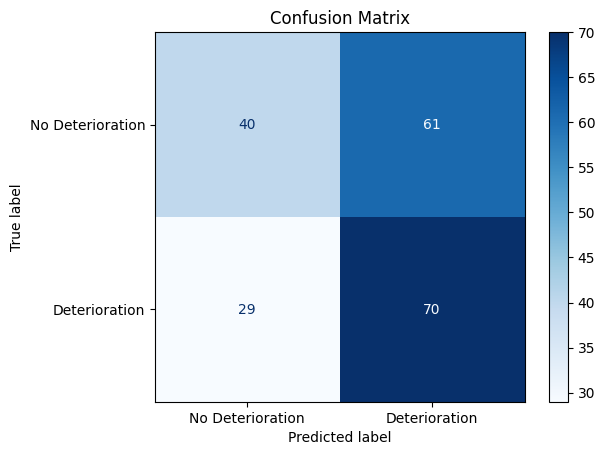

AUPRC: 0.551


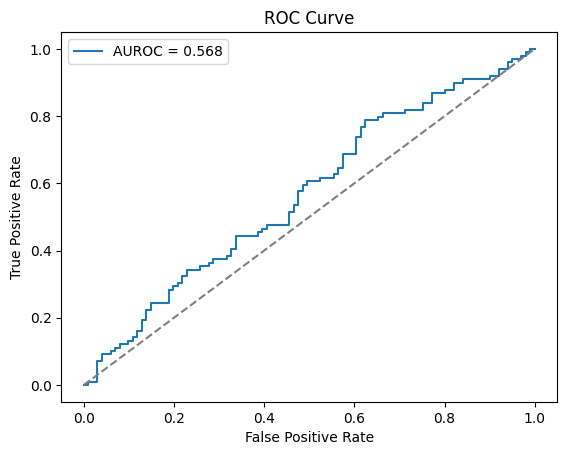

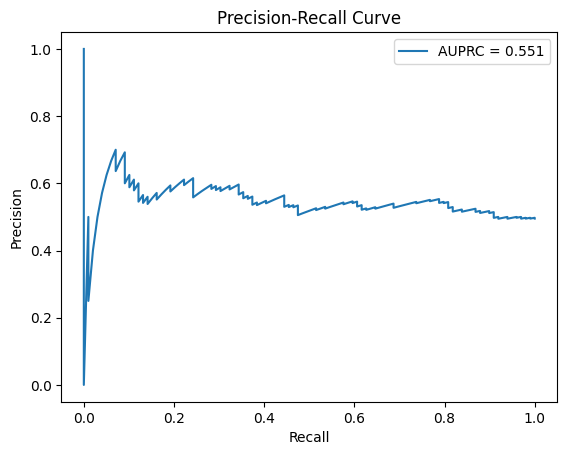

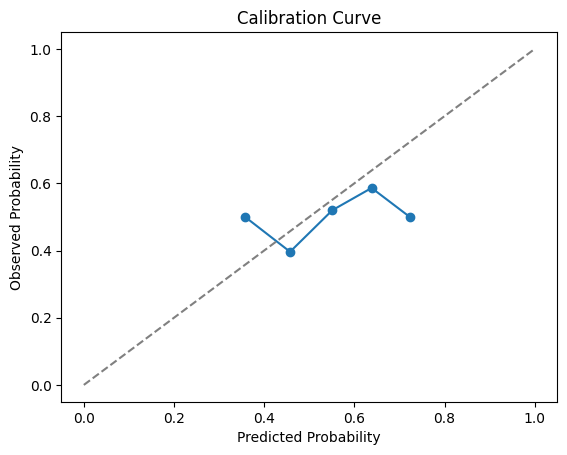

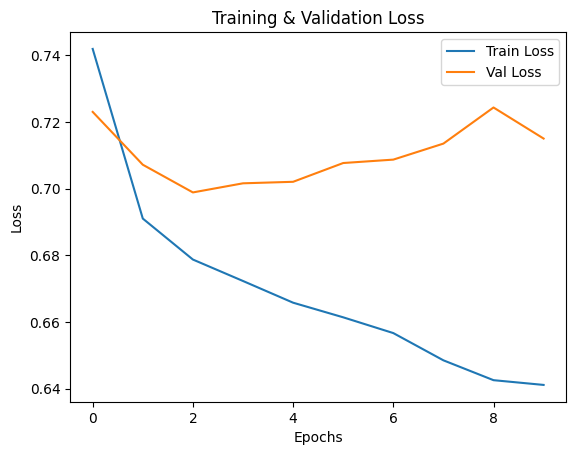

In [16]:
# ================================
# 1. Install dependencies
# ================================
!pip install scikit-learn matplotlib seaborn tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve,
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.calibration import calibration_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# ================================
# 2. Load synthetic datasets
# ================================
train_df = pd.read_csv("synth_train.csv")
test_df = pd.read_csv("synth_test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# ================================
# 3. Prepare time-series features
# ================================
features = ["Age", "BMI", "HbA1c", "Blood_Pressure_Sys", "Blood_Pressure_Dia",
            "Glucose_Level", "Cholesterol", "Medication_Adherence",
            "Exercise_Minutes_Per_Week", "Diet_Score", "Sleep_Hours"]

def prepare_sequences(df, features, label_threshold=50):
    sequences, labels = [], []
    for pid, group in df.groupby("Patient_ID"):
        seq = group[features].values
        label = int(group["Deterioration_Probability"].mean() > label_threshold)  # binary label
        sequences.append(seq)
        labels.append(label)
    return sequences, np.array(labels)

train_sequences, y_train = prepare_sequences(train_df, features)
test_sequences, y_test = prepare_sequences(test_df, features)

# Pad sequences to max length
X_train = pad_sequences(train_sequences, dtype="float32", padding="post")
X_test = pad_sequences(test_sequences, maxlen=X_train.shape[1], dtype="float32", padding="post")

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# ================================
# 4. Build LSTM Model
# ================================
model = Sequential([
    Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, return_sequences=False),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

# ================================
# 5. Train Model
# ================================
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# ================================
# 6. Predictions
# ================================
y_pred_prob = model.predict(X_test).ravel()
y_pred_class = (y_pred_prob > 0.5).astype(int)

# ================================
# 7. Evaluation Metrics
# ================================
# Check if both classes are present in y_test before calculating AUROC and plotting confusion matrix
if len(np.unique(y_test)) > 1:
    auroc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUROC: {auroc:.3f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_class)
    disp = ConfusionMatrixDisplay(cm, display_labels=["No Deterioration", "Deterioration"])
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

else:
    print("AUROC: Not calculated (only one class in y_test)")
    print("Confusion Matrix: Not plotted (only one class in y_test)")

auprc = average_precision_score(y_test, y_pred_prob)
print(f"AUPRC: {auprc:.3f}")


# ================================
# 8. ROC Curve
# ================================
if len(np.unique(y_test)) > 1:
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"AUROC = {auroc:.3f}")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
else:
    print("ROC Curve: Not plotted (only one class in y_test)")


# ================================
# 9. Precision-Recall Curve
# ================================
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, label=f"AUPRC = {auprc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# ================================
# 10. Calibration Curve
# ================================
if len(np.unique(y_test)) > 1:
    prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10)
    plt.plot(prob_pred, prob_true, marker="o")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Observed Probability")
    plt.title("Calibration Curve")
    plt.show()
else:
    print("Calibration Curve: Not plotted (only one class in y_test)")


# ================================
# 11. Training Loss Curve
# ================================
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()

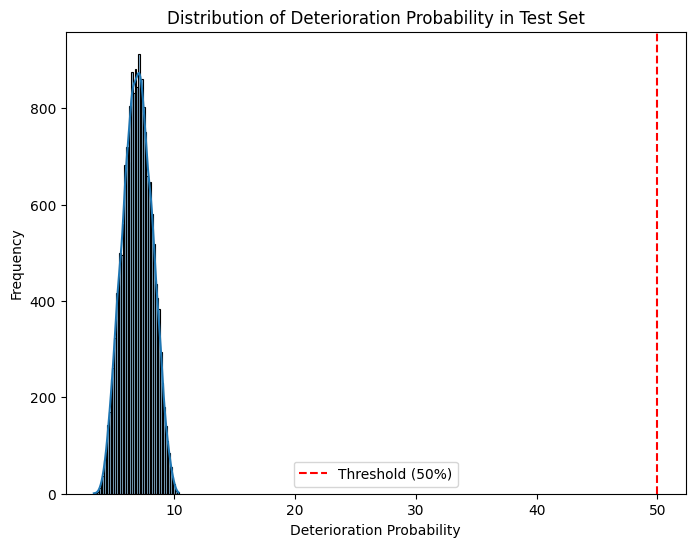

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(test_df["Deterioration_Probability"], bins=50, kde=True)
plt.title("Distribution of Deterioration Probability in Test Set")
plt.xlabel("Deterioration Probability")
plt.ylabel("Frequency")
plt.axvline(x=50, color="red", linestyle="--", label="Threshold (50%)")
plt.legend()
plt.show()

# Task
Explain the error in the selected code. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error.

## Hyperparameter tuning

### Subtask:
Experiment with different hyperparameters for the LSTM model (e.g., number of LSTM units, number of dense layers, learning rate, batch size, number of epochs).


**Reasoning**:
The subtask is to experiment with different hyperparameters for the LSTM model. I will modify the existing code to define a function that builds, compiles, trains, and evaluates the model with specified hyperparameters. This will allow easy experimentation with different combinations. I will start by defining the function and trying one set of hyperparameters.




--- Running experiment with: LSTM Units=64, Dense Layers Units=[32], Learning Rate=0.001, Batch Size=32, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_9 (Masking)             │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
AUROC: 0.459


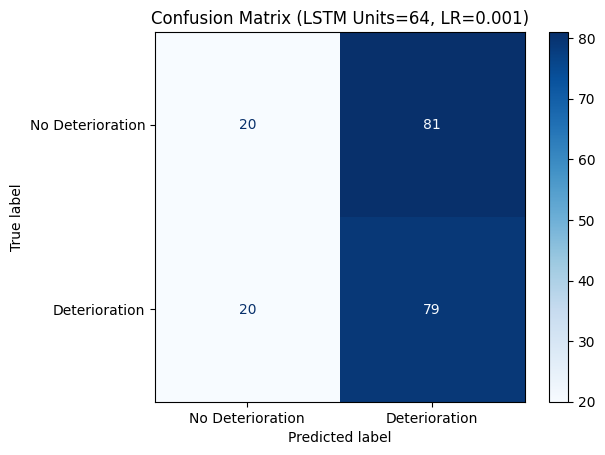

AUPRC: 0.458


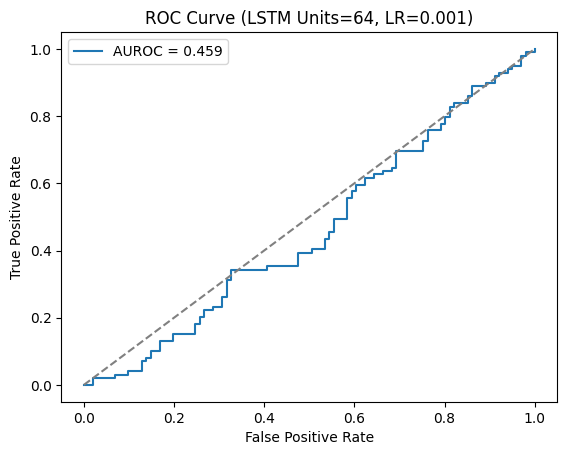

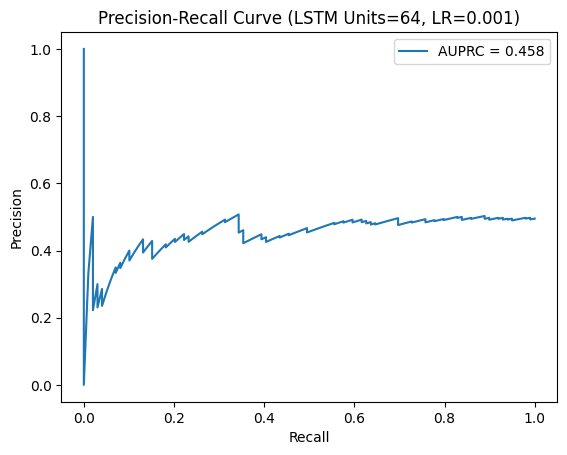

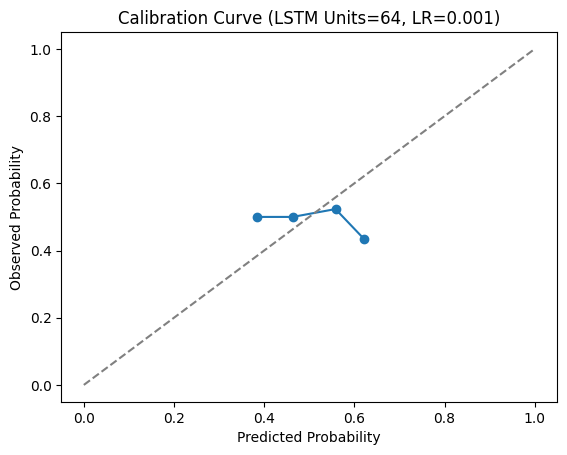

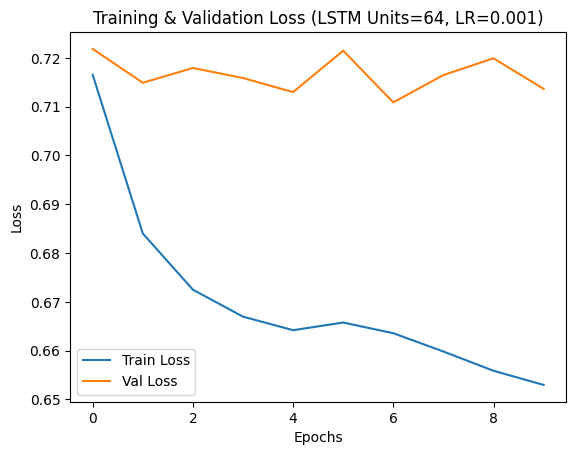

(np.float64(0.4594459445944594), np.float64(0.4581760893637261))

In [17]:
from tensorflow.keras.optimizers import Adam

def run_lstm_experiment(lstm_units, dense_layers_units, learning_rate, batch_size, epochs, X_train, y_train, X_test, y_test):
    """Builds, trains, and evaluates an LSTM model with given hyperparameters."""

    print(f"\n--- Running experiment with: LSTM Units={lstm_units}, Dense Layers Units={dense_layers_units}, Learning Rate={learning_rate}, Batch Size={batch_size}, Epochs={epochs} ---")

    # Build LSTM model
    model = Sequential([
        Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])),
        LSTM(lstm_units, return_sequences=False),
    ])

    for units in dense_layers_units:
        model.add(Dense(units, activation="relu"))

    model.add(Dense(1, activation="sigmoid"))

    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    model.summary()

    # Train Model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=0)

    # Predictions
    y_pred_prob = model.predict(X_test).ravel()
    y_pred_class = (y_pred_prob > 0.5).astype(int)

    # Evaluation Metrics
    auroc, auprc = np.nan, np.nan # Initialize with NaN in case of single class

    if len(np.unique(y_test)) > 1:
        auroc = roc_auc_score(y_test, y_pred_prob)
        print(f"AUROC: {auroc:.3f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred_class)
        disp = ConfusionMatrixDisplay(cm, display_labels=["No Deterioration", "Deterioration"])
        disp.plot(cmap="Blues")
        plt.title(f"Confusion Matrix (LSTM Units={lstm_units}, LR={learning_rate})")
        plt.show()
    else:
        print("AUROC: Not calculated (only one class in y_test)")
        print("Confusion Matrix: Not plotted (only one class in y_test)")


    auprc = average_precision_score(y_test, y_pred_prob)
    print(f"AUPRC: {auprc:.3f}")

    # ROC Curve
    if len(np.unique(y_test)) > 1:
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"AUROC = {auroc:.3f}")
        plt.plot([0, 1], [0, 1], "--", color="gray")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve (LSTM Units={lstm_units}, LR={learning_rate})")
        plt.legend()
        plt.show()
    else:
        print("ROC Curve: Not plotted (only one class in y_test)")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall, precision, label=f"AUPRC = {auprc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve (LSTM Units={lstm_units}, LR={learning_rate})")
    plt.legend()
    plt.show()

    # Calibration Curve
    if len(np.unique(y_test)) > 1:
        prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10)
        plt.plot(prob_pred, prob_true, marker="o")
        plt.plot([0, 1], [0, 1], "--", color="gray")
        plt.xlabel("Predicted Probability")
        plt.ylabel("Observed Probability")
        plt.title(f"Calibration Curve (LSTM Units={lstm_units}, LR={learning_rate})")
        plt.show()
    else:
        print("Calibration Curve: Not plotted (only one class in y_test)")

    # Training Loss Curve
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Training & Validation Loss (LSTM Units={lstm_units}, LR={learning_rate})")
    plt.legend()
    plt.show()

    return auroc, auprc

# Run an initial experiment with base hyperparameters
run_lstm_experiment(lstm_units=64, dense_layers_units=[32], learning_rate=0.001, batch_size=32, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

**Reasoning**:
The previous step defined a function to run experiments and executed one experiment. To address the subtask of experimenting with different hyperparameters, I will now run several experiments with different combinations of LSTM units, dense layer configurations, learning rates, batch sizes, and epochs. I will systematically vary these parameters and record the results.




--- Running experiment with: LSTM Units=128, Dense Layers Units=[32], Learning Rate=0.001, Batch Size=32, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_10 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 128)            │        71,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,841 (296.25 KB)

 Trainable params: 75,841 (296.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
AUROC: 0.430


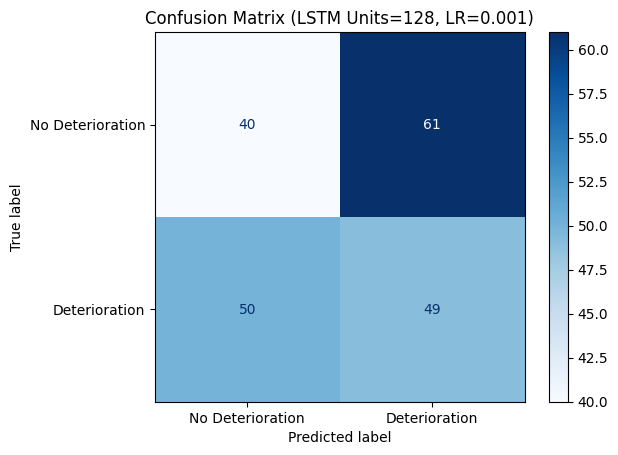

AUPRC: 0.458


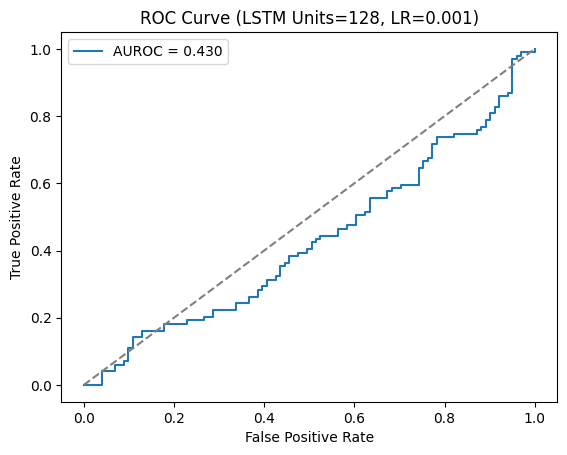

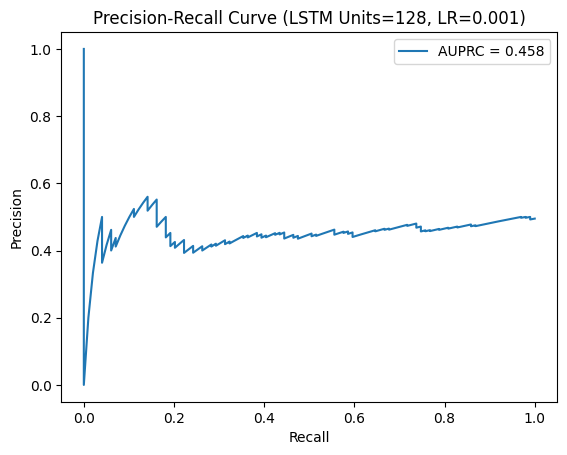

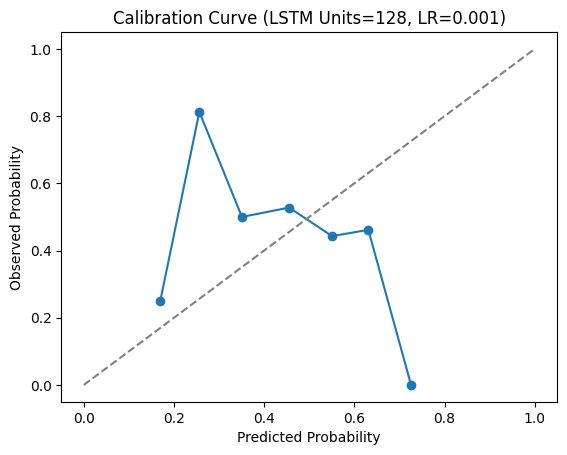

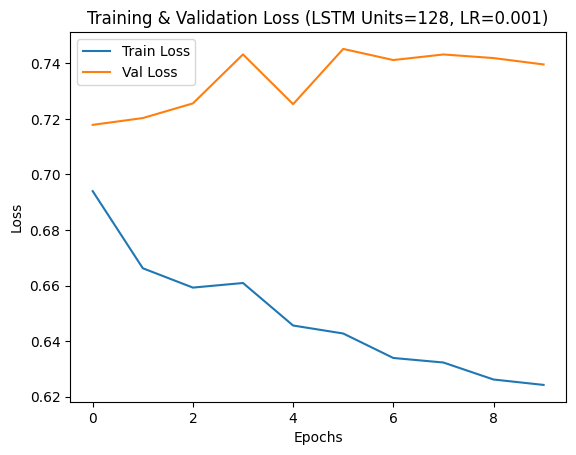


--- Running experiment with: LSTM Units=32, Dense Layers Units=[32], Learning Rate=0.001, Batch Size=32, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_11 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 32)             │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,721 (26.25 KB)

 Trainable params: 6,721 (26.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
AUROC: 0.497


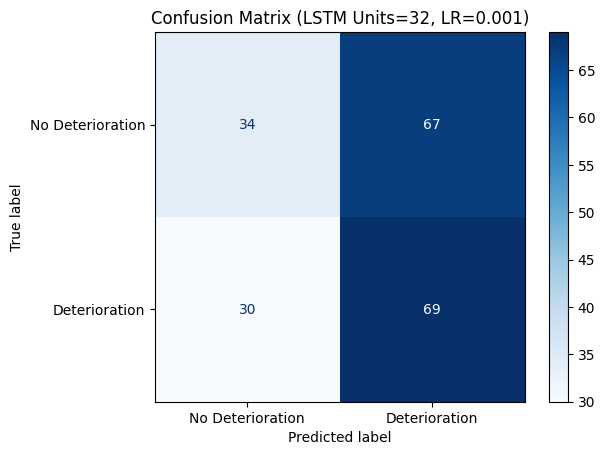

AUPRC: 0.528


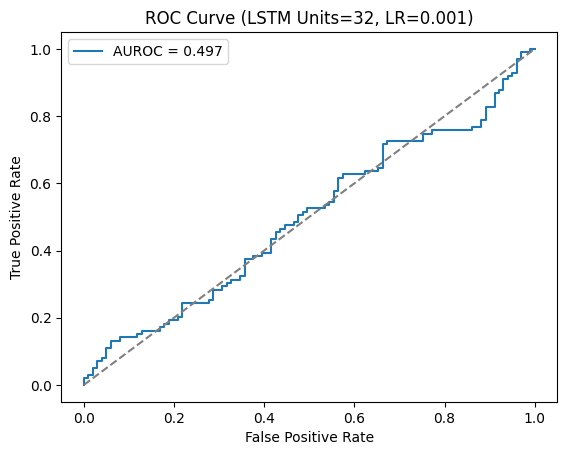

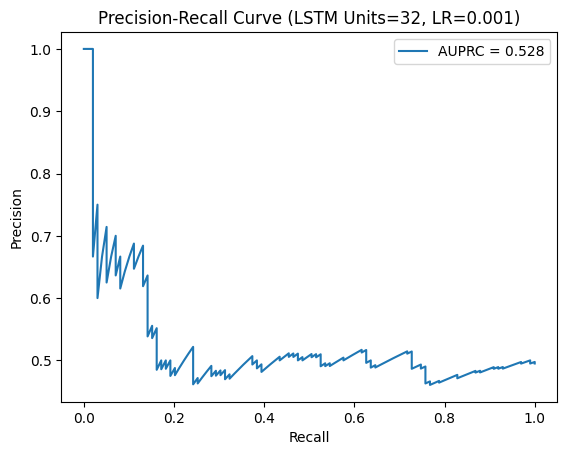

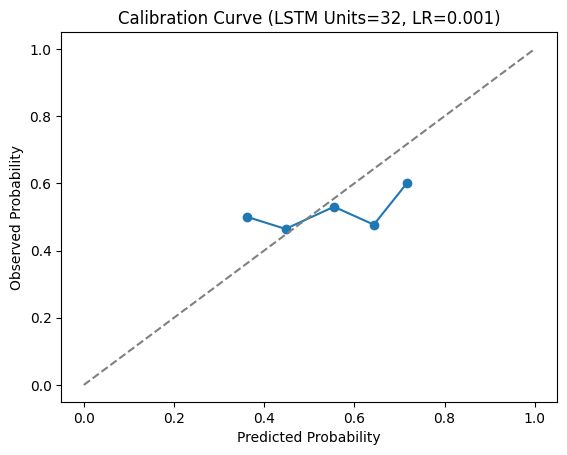

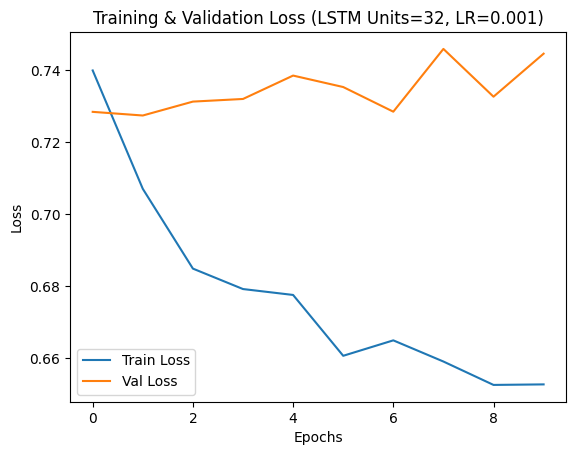


--- Running experiment with: LSTM Units=64, Dense Layers Units=[32, 16], Learning Rate=0.001, Batch Size=32, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_12 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,081 (86.25 KB)

 Trainable params: 22,081 (86.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
AUROC: 0.486


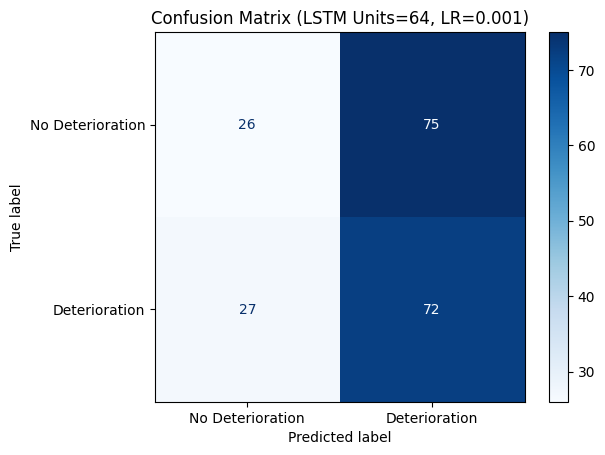

AUPRC: 0.500


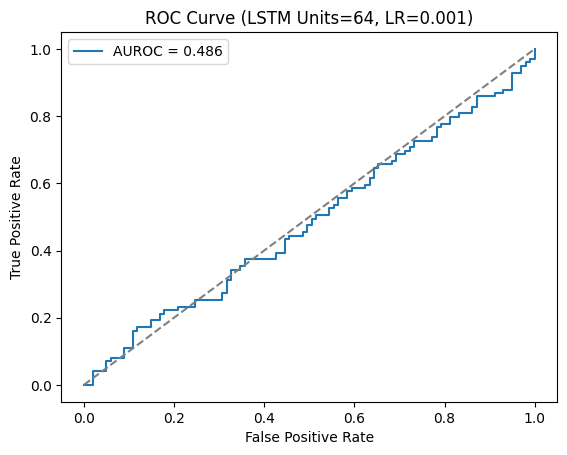

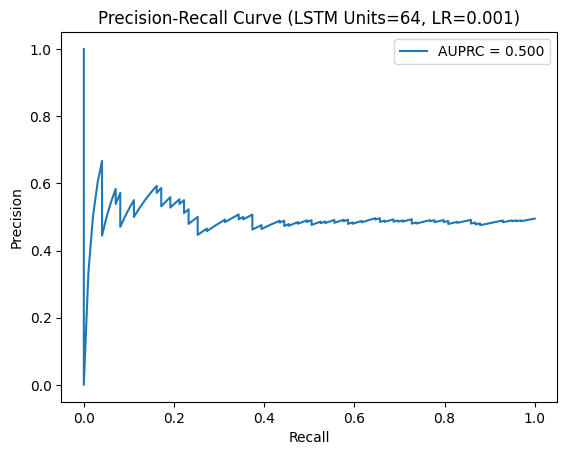

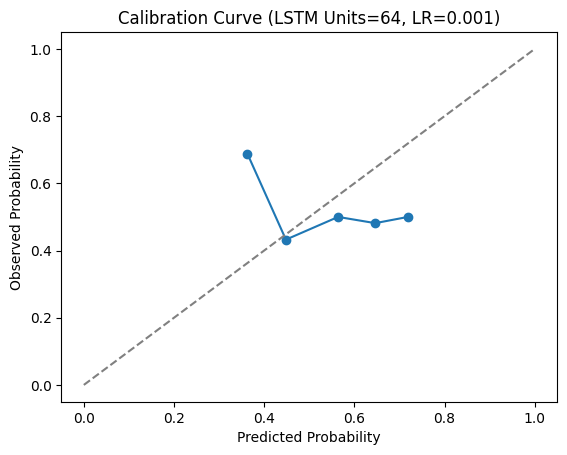

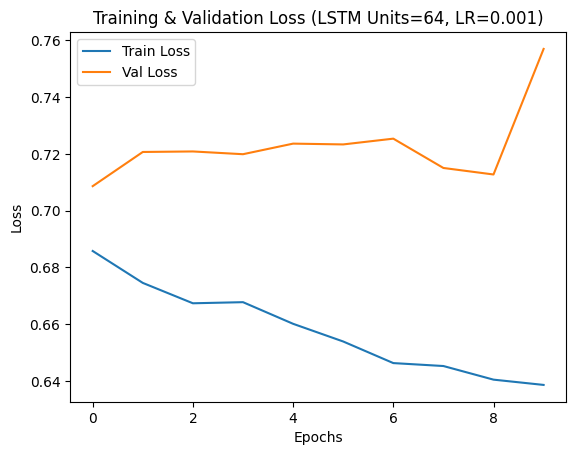


--- Running experiment with: LSTM Units=64, Dense Layers Units=[], Learning Rate=0.001, Batch Size=32, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_13 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,521 (76.25 KB)

 Trainable params: 19,521 (76.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
AUROC: 0.451


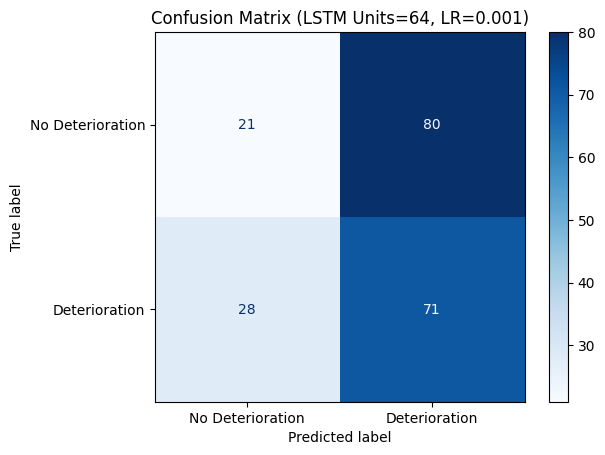

AUPRC: 0.504


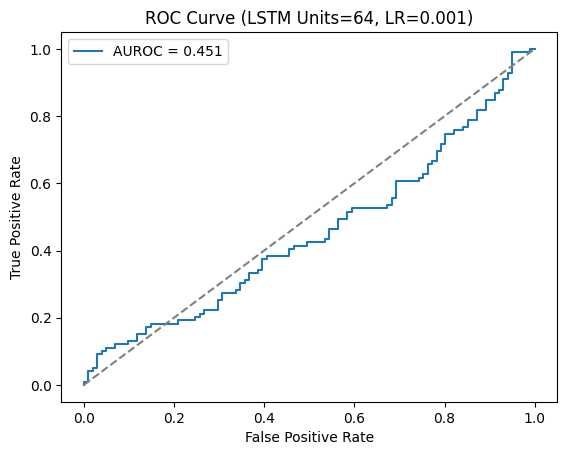

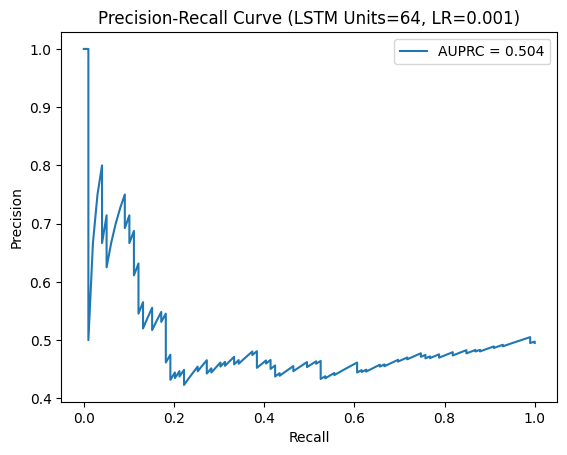

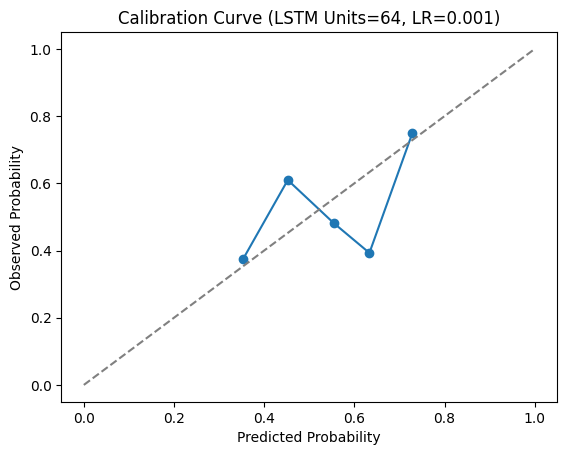

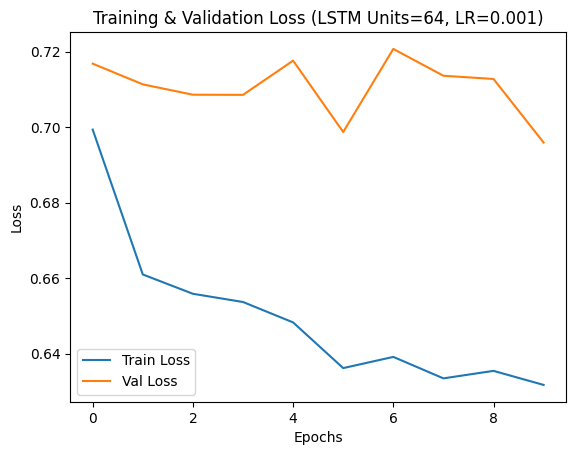


--- Running experiment with: LSTM Units=64, Dense Layers Units=[32], Learning Rate=0.0005, Batch Size=32, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_14 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
AUROC: 0.431


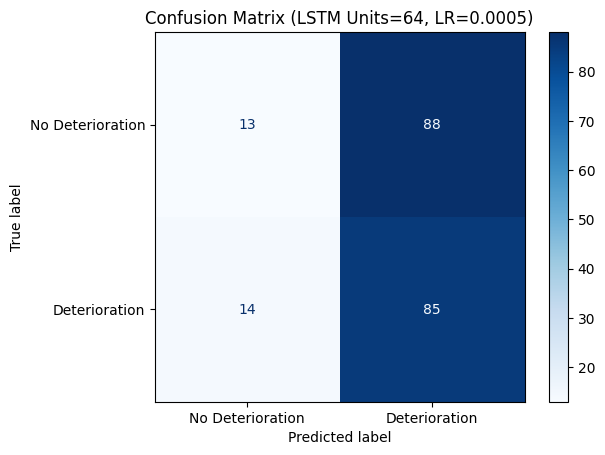

AUPRC: 0.452


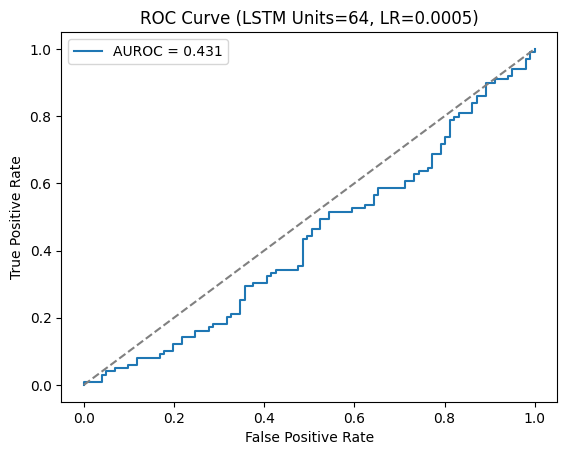

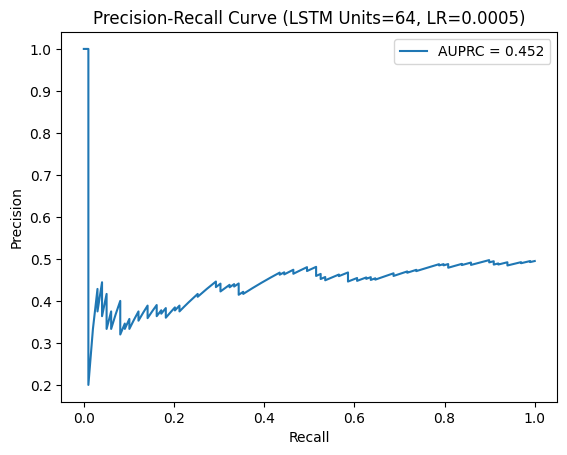

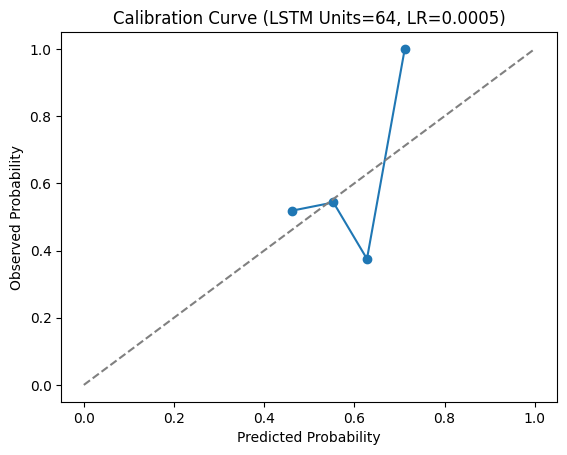

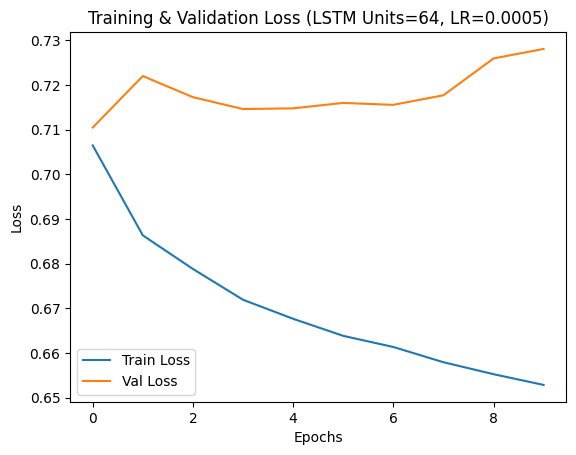


--- Running experiment with: LSTM Units=64, Dense Layers Units=[32], Learning Rate=0.005, Batch Size=32, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_15 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
AUROC: 0.460


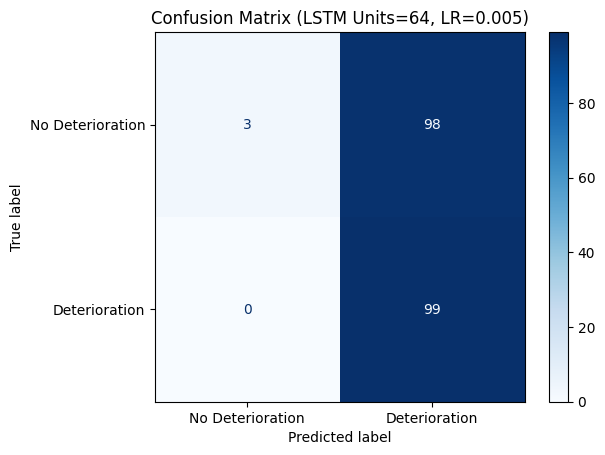

AUPRC: 0.460


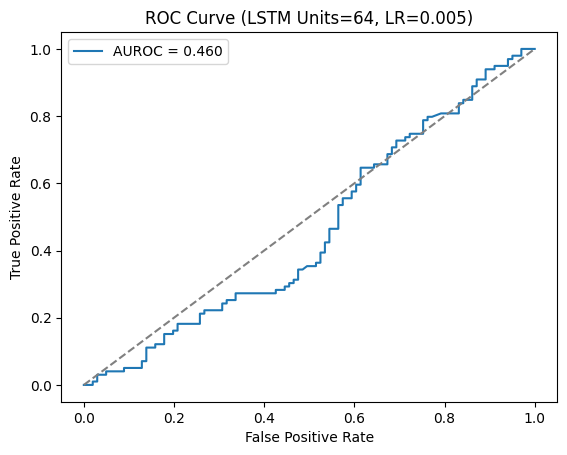

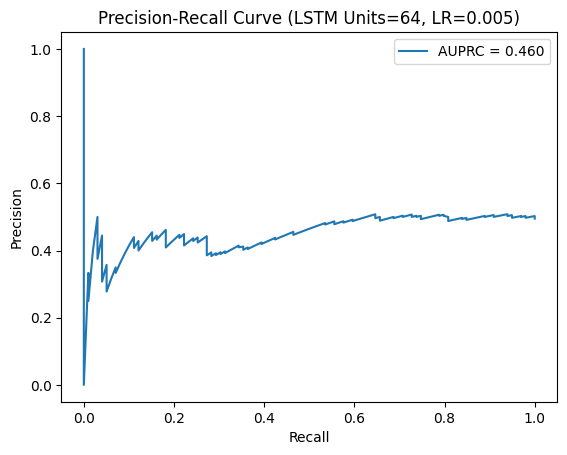

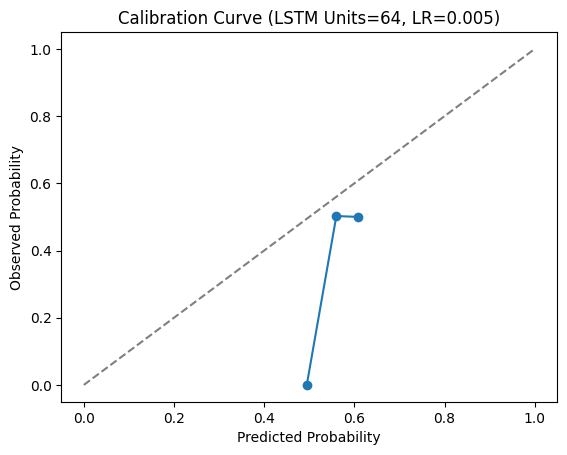

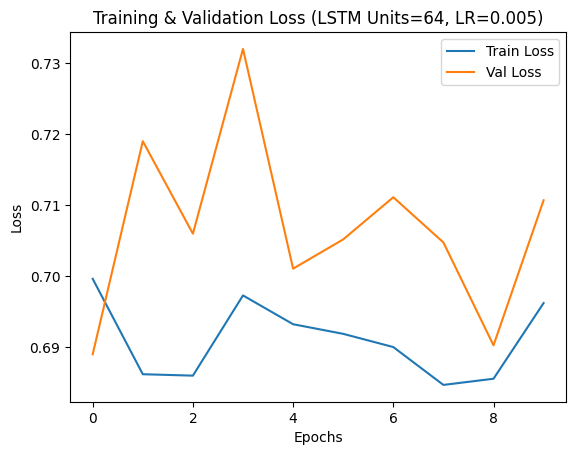


--- Running experiment with: LSTM Units=64, Dense Layers Units=[32], Learning Rate=0.001, Batch Size=16, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_16 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
AUROC: 0.497


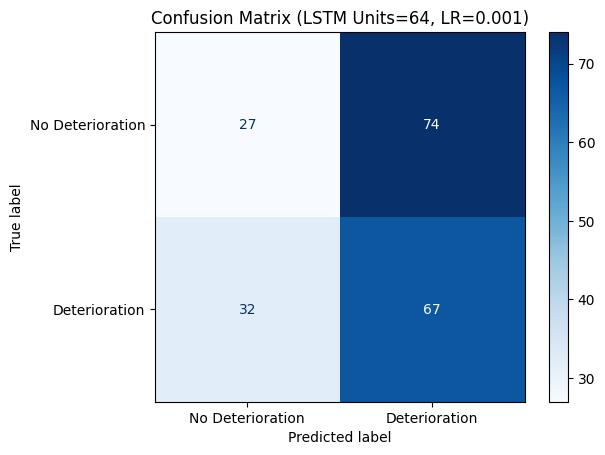

AUPRC: 0.518


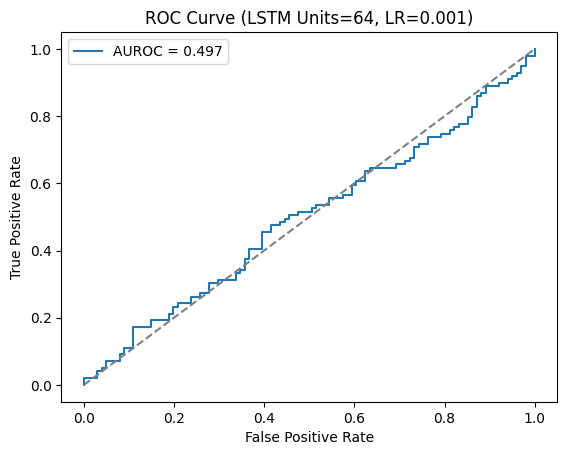

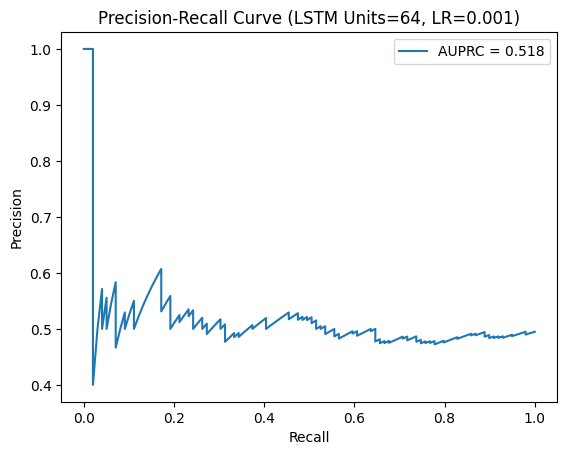

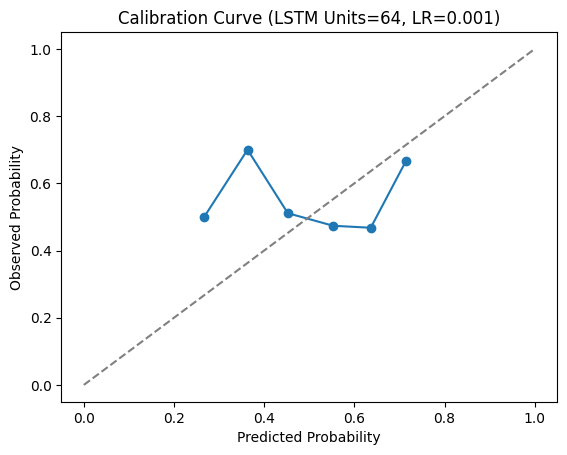

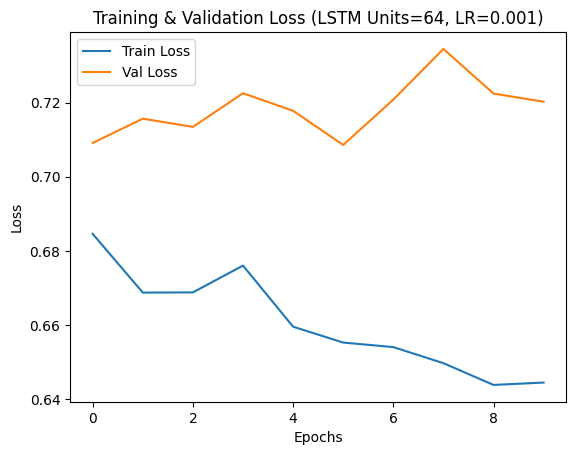


--- Running experiment with: LSTM Units=64, Dense Layers Units=[32], Learning Rate=0.001, Batch Size=64, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_17 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
AUROC: 0.415


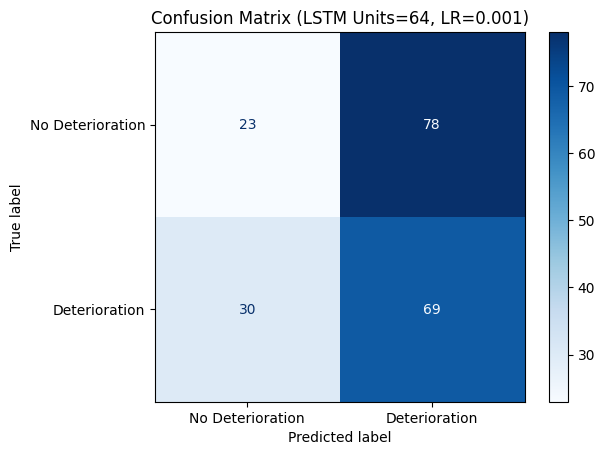

AUPRC: 0.457


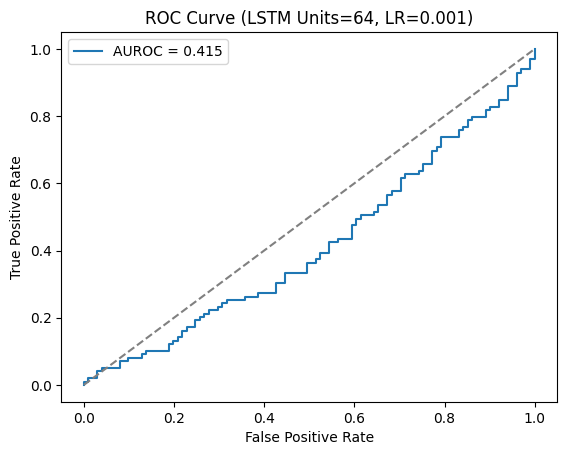

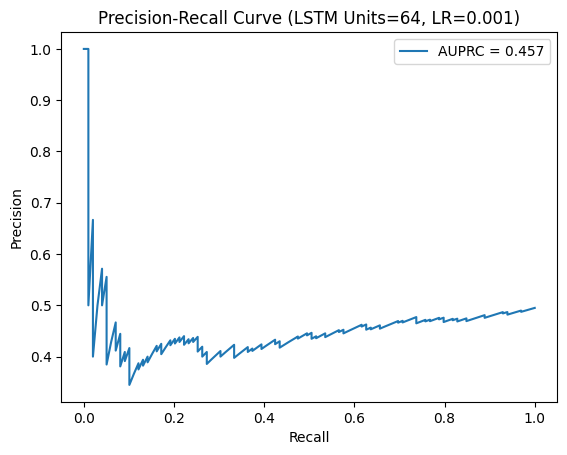

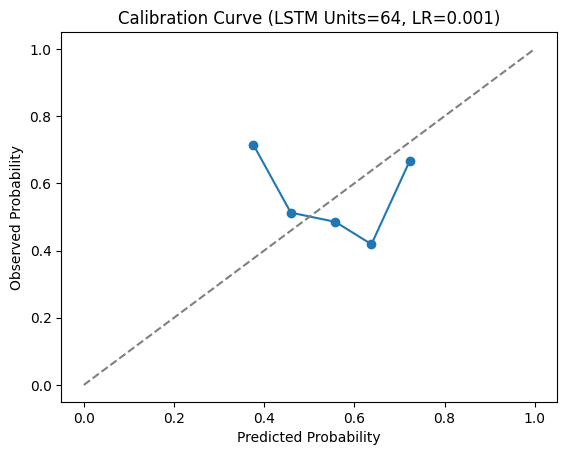

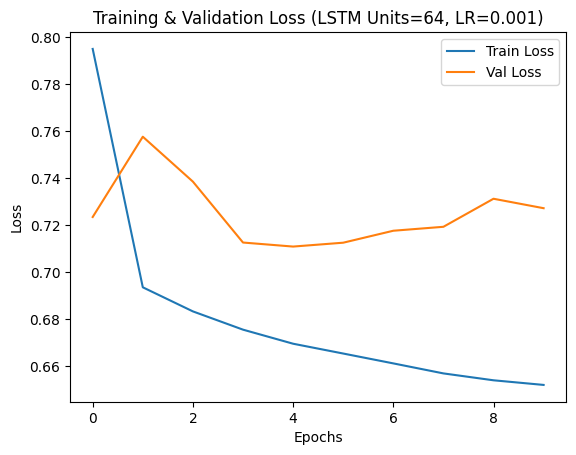


--- Running experiment with: LSTM Units=64, Dense Layers Units=[32], Learning Rate=0.001, Batch Size=32, Epochs=20 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_18 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
AUROC: 0.474


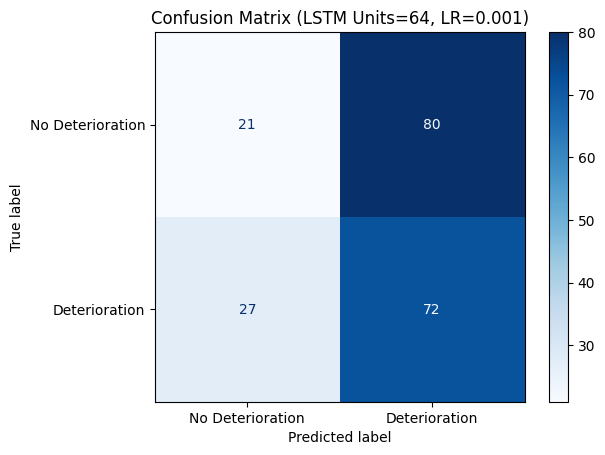

AUPRC: 0.491


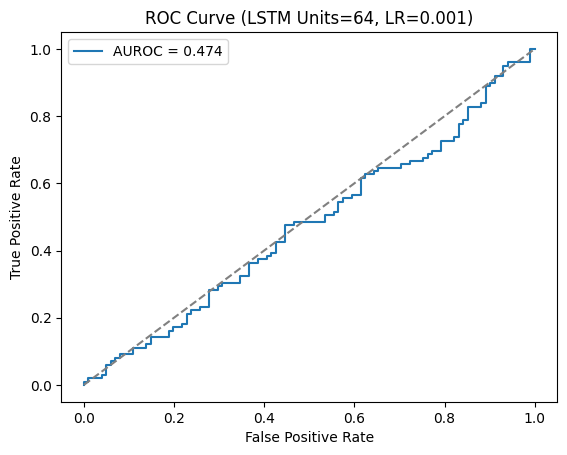

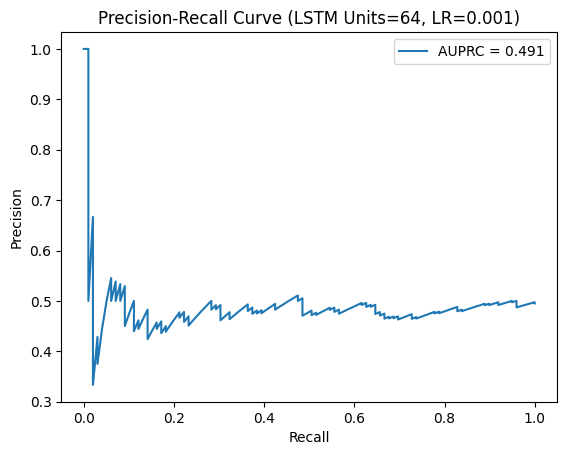

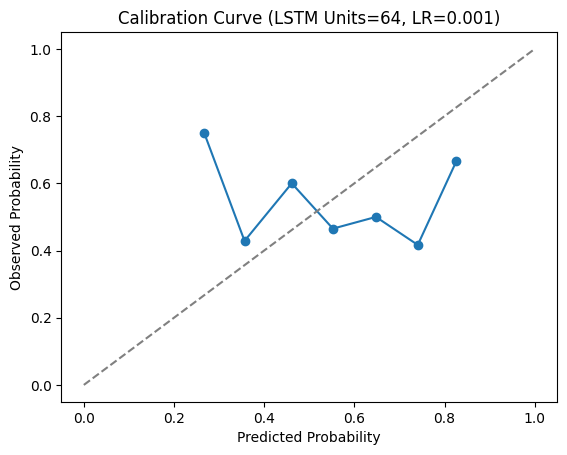

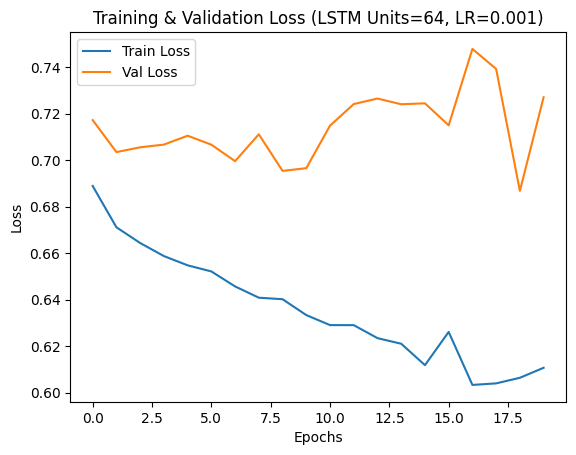


--- Running experiment with: LSTM Units=64, Dense Layers Units=[32], Learning Rate=0.001, Batch Size=32, Epochs=50 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_19 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
AUROC: 0.537


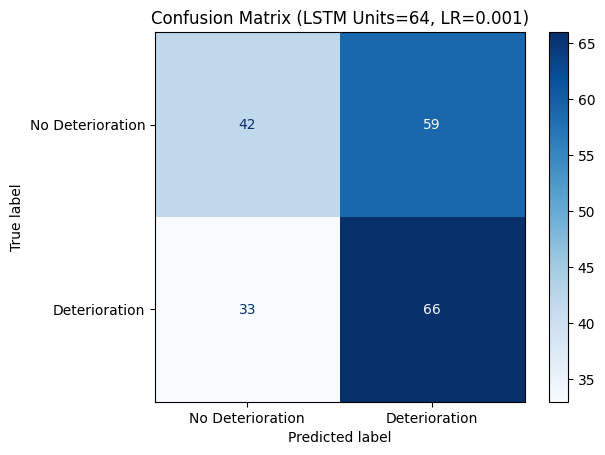

AUPRC: 0.512


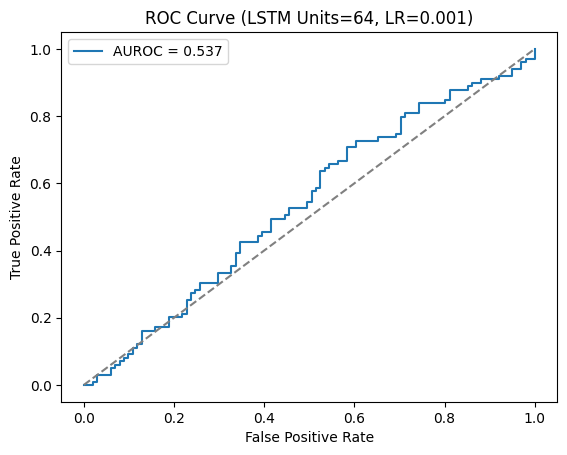

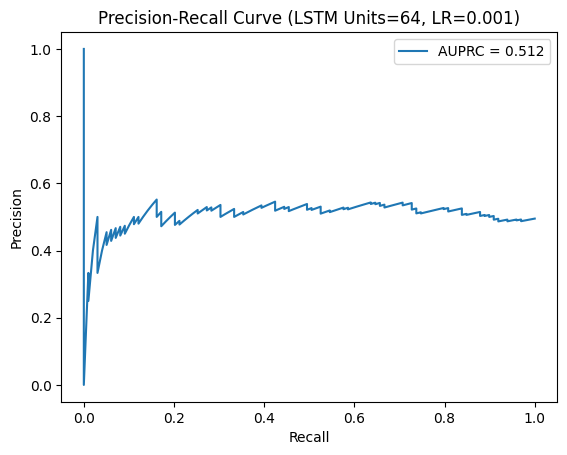

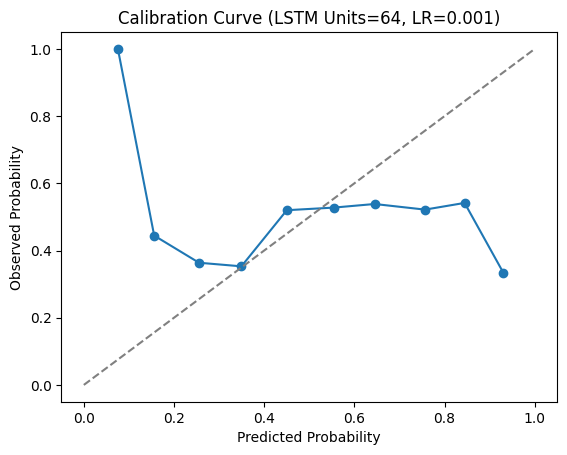

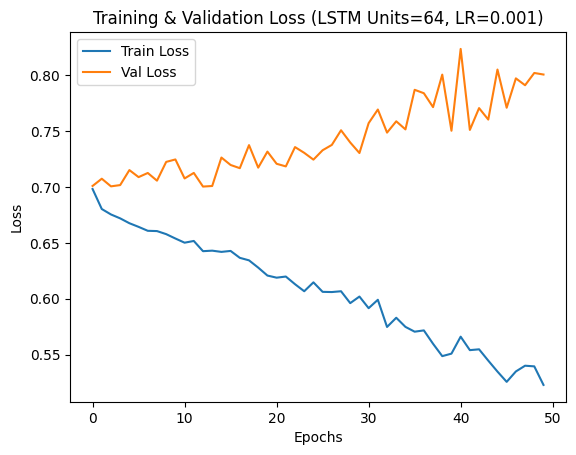

(np.float64(0.5373537353735374), np.float64(0.511680263530731))

In [18]:
# Experiment with different hyperparameters

# Experiment 1: More LSTM units
run_lstm_experiment(lstm_units=128, dense_layers_units=[32], learning_rate=0.001, batch_size=32, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 2: Fewer LSTM units
run_lstm_experiment(lstm_units=32, dense_layers_units=[32], learning_rate=0.001, batch_size=32, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 3: More dense layers
run_lstm_experiment(lstm_units=64, dense_layers_units=[32, 16], learning_rate=0.001, batch_size=32, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 4: No dense layers
run_lstm_experiment(lstm_units=64, dense_layers_units=[], learning_rate=0.001, batch_size=32, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 5: Different learning rate (lower)
run_lstm_experiment(lstm_units=64, dense_layers_units=[32], learning_rate=0.0005, batch_size=32, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 6: Different learning rate (higher)
run_lstm_experiment(lstm_units=64, dense_layers_units=[32], learning_rate=0.005, batch_size=32, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 7: Smaller batch size
run_lstm_experiment(lstm_units=64, dense_layers_units=[32], learning_rate=0.001, batch_size=16, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 8: Larger batch size
run_lstm_experiment(lstm_units=64, dense_layers_units=[32], learning_rate=0.001, batch_size=64, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 9: More epochs
run_lstm_experiment(lstm_units=64, dense_layers_units=[32], learning_rate=0.001, batch_size=32, epochs=20, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 10: Even more epochs
run_lstm_experiment(lstm_units=64, dense_layers_units=[32], learning_rate=0.001, batch_size=32, epochs=50, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

## Model architecture exploration

### Subtask:
Consider more complex or different model architectures that might be better suited for time-series data with the current feature set.


**Reasoning**:
Implement alternative time series classification models (GRU and 1D CNN) and train them to compare their performance against the LSTM model. This addresses steps 1, 2, 3, 4, and partially step 5 of the subtask.



In [19]:
# ================================
# Implement GRU Model
# ================================
gru_model = Sequential([
    Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])),
    GRU(64, return_sequences=False),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

gru_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print("GRU Model Summary:")
gru_model.summary()

# Train GRU Model
print("\nTraining GRU Model...")
history_gru = gru_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# Evaluate GRU Model
print("\nEvaluating GRU Model...")
y_pred_prob_gru = gru_model.predict(X_test).ravel()
y_pred_class_gru = (y_pred_prob_gru > 0.5).astype(int)

if len(np.unique(y_test)) > 1:
    auroc_gru = roc_auc_score(y_test, y_pred_prob_gru)
    print(f"GRU AUROC: {auroc_gru:.3f}")
else:
    print("GRU AUROC: Not calculated (only one class in y_test)")

auprc_gru = average_precision_score(y_test, y_pred_prob_gru)
print(f"GRU AUPRC: {auprc_gru:.3f}")


# ================================
# Implement 1D CNN Model
# ================================
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

cnn_model = Sequential([
    Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])),
    Conv1D(filters=64, kernel_size=3, activation="relu"),
    GlobalMaxPooling1D(),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

cnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print("\n1D CNN Model Summary:")
cnn_model.summary()

# Train 1D CNN Model
print("\nTraining 1D CNN Model...")
history_cnn = cnn_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# Evaluate 1D CNN Model
print("\nEvaluating 1D CNN Model...")
y_pred_prob_cnn = cnn_model.predict(X_test).ravel()
y_pred_class_cnn = (y_pred_prob_cnn > 0.5).astype(int)

if len(np.unique(y_test)) > 1:
    auroc_cnn = roc_auc_score(y_test, y_pred_prob_cnn)
    print(f"1D CNN AUROC: {auroc_cnn:.3f}")
else:
    print("1D CNN AUROC: Not calculated (only one class in y_test)")

auprc_cnn = average_precision_score(y_test, y_pred_prob_cnn)
print(f"1D CNN AUPRC: {auprc_cnn:.3f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


NameError: name 'GRU' is not defined

**Reasoning**:
The previous code block failed because the `GRU` layer was not imported. I need to import `GRU` and `Conv1D` and `GlobalMaxPooling1D` from `tensorflow.keras.layers`. Then, I will re-run the code to define, compile, train, and evaluate the GRU and 1D CNN models.



In [20]:
from tensorflow.keras.layers import GRU, Conv1D, GlobalMaxPooling1D

# ================================
# Implement GRU Model
# ================================
gru_model = Sequential([
    Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])),
    GRU(64, return_sequences=False),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

gru_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print("GRU Model Summary:")
gru_model.summary()

# Train GRU Model
print("\nTraining GRU Model...")
history_gru = gru_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# Evaluate GRU Model
print("\nEvaluating GRU Model...")
y_pred_prob_gru = gru_model.predict(X_test).ravel()
y_pred_class_gru = (y_pred_prob_gru > 0.5).astype(int)

if len(np.unique(y_test)) > 1:
    auroc_gru = roc_auc_score(y_test, y_pred_prob_gru)
    print(f"GRU AUROC: {auroc_gru:.3f}")
else:
    print("GRU AUROC: Not calculated (only one class in y_test)")

auprc_gru = average_precision_score(y_test, y_pred_prob_gru)
print(f"GRU AUPRC: {auprc_gru:.3f}")


# ================================
# Implement 1D CNN Model
# ================================
cnn_model = Sequential([
    Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])),
    Conv1D(filters=64, kernel_size=3, activation="relu"),
    GlobalMaxPooling1D(),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

cnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print("\n1D CNN Model Summary:")
cnn_model.summary()

# Train 1D CNN Model
print("\nTraining 1D CNN Model...")
history_cnn = cnn_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# Evaluate 1D CNN Model
print("\nEvaluating 1D CNN Model...")
y_pred_prob_cnn = cnn_model.predict(X_test).ravel()
y_pred_class_cnn = (y_pred_prob_cnn > 0.5).astype(int)

if len(np.unique(y_test)) > 1:
    auroc_cnn = roc_auc_score(y_test, y_pred_prob_cnn)
    print(f"1D CNN AUROC: {auroc_cnn:.3f}")
else:
    print("1D CNN AUROC: Not calculated (only one class in y_test)")

auprc_cnn = average_precision_score(y_test, y_pred_prob_cnn)
print(f"1D CNN AUPRC: {auprc_cnn:.3f}")

GRU Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_21 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        14,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)


Training GRU Model...
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.5106 - loss: 0.7161 - val_accuracy: 0.4800 - val_loss: 0.7111
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5371 - loss: 0.6908 - val_accuracy: 0.4100 - val_loss: 0.7294
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5284 - loss: 0.6996 - val_accuracy: 0.4500 - val_loss: 0.7300
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5827 - loss: 0.6716 - val_accuracy: 0.4300 - val_loss: 0.7172
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6127 - loss: 0.6608 - val_accuracy: 0.5100 - val_loss: 0.7225
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5317 - loss: 0.6851 - val_accuracy: 0.5200 - val_loss: 0.7252
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.5871 - loss: 0.6699 - val_accuracy: 0.5200 - val_loss: 0.7183
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.6301 - loss: 0.6639 - 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_22 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 178, 64)        │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)


Training 1D CNN Model...
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4927 - loss: 7.3785 - val_accuracy: 0.5400 - val_loss: 4.8134
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5212 - loss: 3.7696 - val_accuracy: 0.5300 - val_loss: 2.2736
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4813 - loss: 2.1890 - val_accuracy: 0.5300 - val_loss: 2.1856
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4739 - loss: 2.1350 - val_accuracy: 0.4900 - val_loss: 2.5078
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5484 - loss: 1.8869 - val_accuracy: 0.5300 - val_loss: 2.9106
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5662 - loss: 2.1636 - val_accuracy: 0.4500 - val_loss: 2.3968
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5631 - loss: 1.7981 - val_accuracy: 0.4800 - val_loss: 2.2300
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5867 - loss: 1.6082 - val_a

**Reasoning**:
Now that the GRU and 1D CNN models have been trained and evaluated, I need to visualize their performance using the specified plots (Confusion Matrix, ROC Curve, Precision-Recall Curve, Calibration Curve, and Training/Validation Loss). This addresses the remaining parts of step 5 and partially step 6.




--- GRU Model Evaluation Plots ---


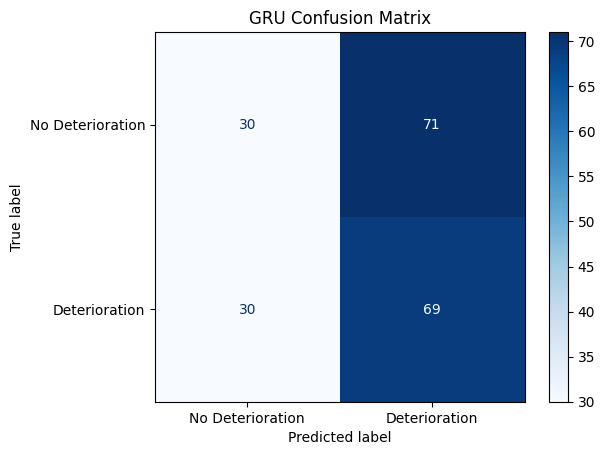

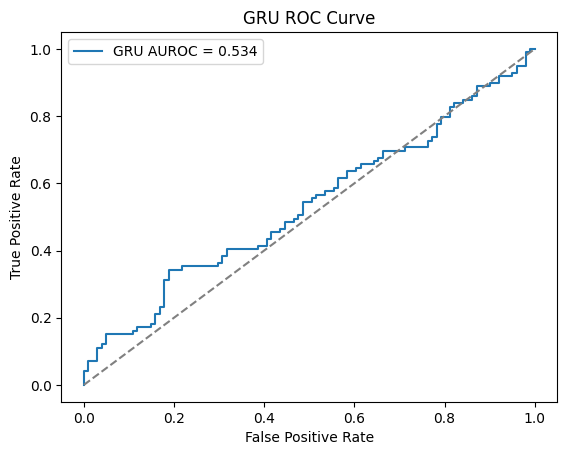

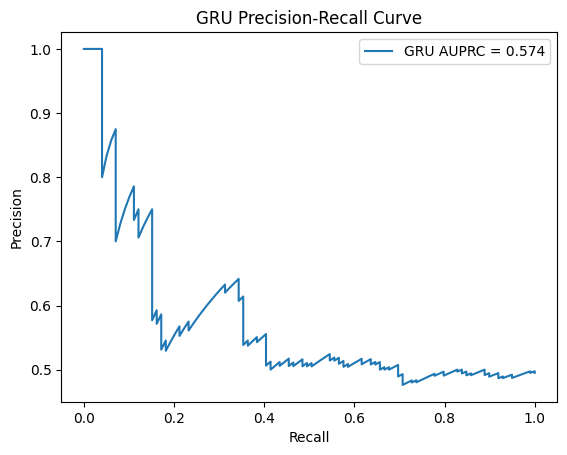

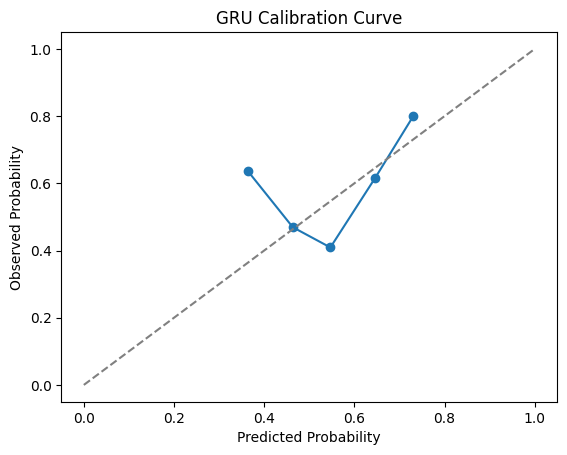

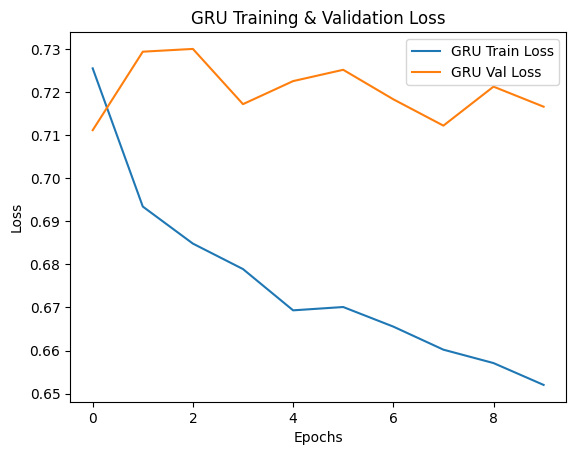


--- 1D CNN Model Evaluation Plots ---


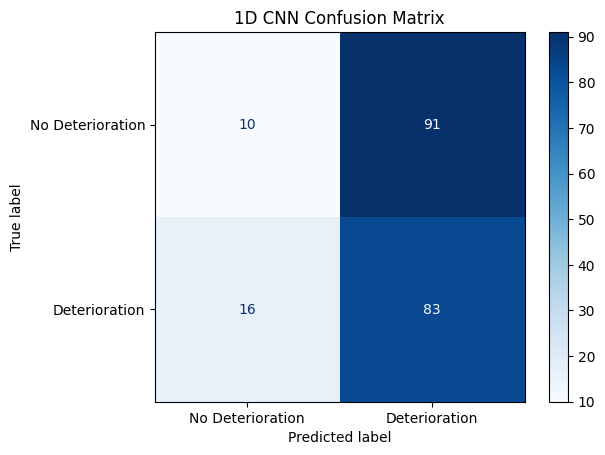

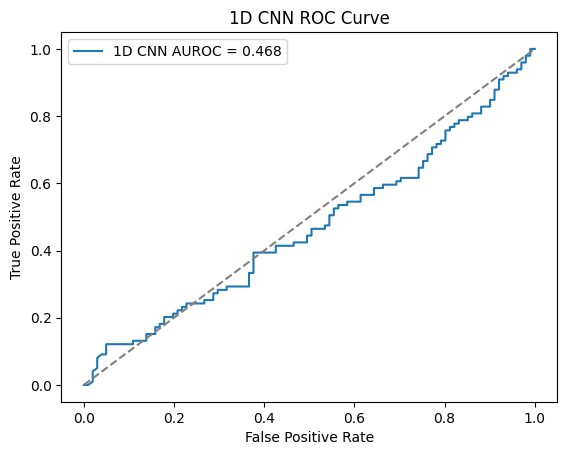

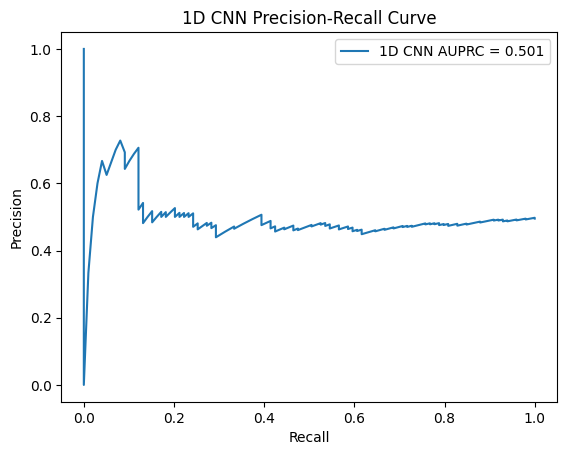

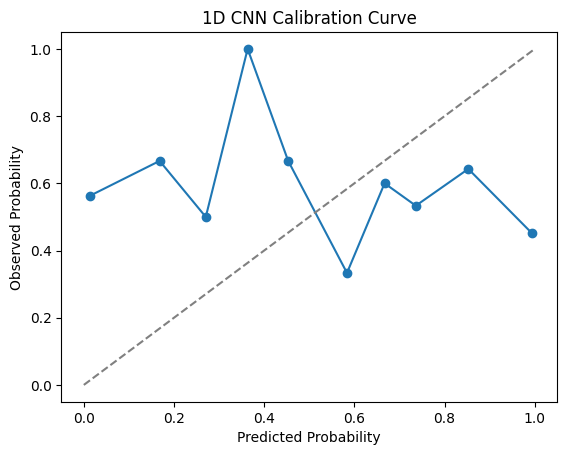

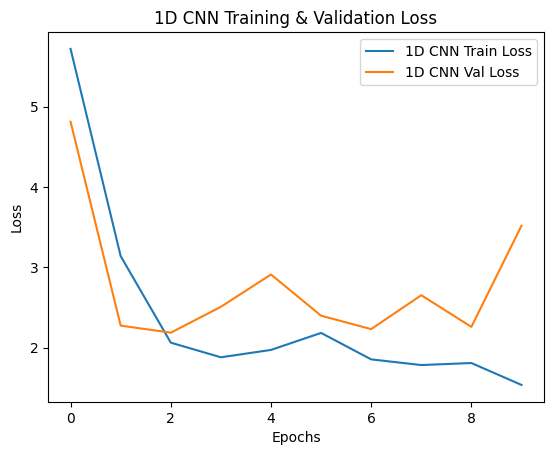

In [21]:
# ================================
# GRU Model Plots
# ================================
print("\n--- GRU Model Evaluation Plots ---")

# Confusion Matrix
if len(np.unique(y_test)) > 1:
    cm_gru = confusion_matrix(y_test, y_pred_class_gru)
    disp_gru = ConfusionMatrixDisplay(cm_gru, display_labels=["No Deterioration", "Deterioration"])
    disp_gru.plot(cmap="Blues")
    plt.title("GRU Confusion Matrix")
    plt.show()
else:
    print("GRU Confusion Matrix: Not plotted (only one class in y_test)")

# ROC Curve
if len(np.unique(y_test)) > 1:
    fpr_gru, tpr_gru, _ = roc_curve(y_test, y_pred_prob_gru)
    plt.plot(fpr_gru, tpr_gru, label=f"GRU AUROC = {auroc_gru:.3f}")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("GRU ROC Curve")
    plt.legend()
    plt.show()
else:
    print("GRU ROC Curve: Not plotted (only one class in y_test)")

# Precision-Recall Curve
precision_gru, recall_gru, _ = precision_recall_curve(y_test, y_pred_prob_gru)
plt.plot(recall_gru, precision_gru, label=f"GRU AUPRC = {auprc_gru:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("GRU Precision-Recall Curve")
plt.legend()
plt.show()

# Calibration Curve
if len(np.unique(y_test)) > 1:
    prob_true_gru, prob_pred_gru = calibration_curve(y_test, y_pred_prob_gru, n_bins=10)
    plt.plot(prob_pred_gru, prob_true_gru, marker="o")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Observed Probability")
    plt.title("GRU Calibration Curve")
    plt.show()
else:
    print("GRU Calibration Curve: Not plotted (only one class in y_test)")

# Training Loss Curve
plt.plot(history_gru.history["loss"], label="GRU Train Loss")
plt.plot(history_gru.history["val_loss"], label="GRU Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("GRU Training & Validation Loss")
plt.legend()
plt.show()


# ================================
# 1D CNN Model Plots
# ================================
print("\n--- 1D CNN Model Evaluation Plots ---")

# Confusion Matrix
if len(np.unique(y_test)) > 1:
    cm_cnn = confusion_matrix(y_test, y_pred_class_cnn)
    disp_cnn = ConfusionMatrixDisplay(cm_cnn, display_labels=["No Deterioration", "Deterioration"])
    disp_cnn.plot(cmap="Blues")
    plt.title("1D CNN Confusion Matrix")
    plt.show()
else:
    print("1D CNN Confusion Matrix: Not plotted (only one class in y_test)")

# ROC Curve
if len(np.unique(y_test)) > 1:
    fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_prob_cnn)
    plt.plot(fpr_cnn, tpr_cnn, label=f"1D CNN AUROC = {auroc_cnn:.3f}")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("1D CNN ROC Curve")
    plt.legend()
    plt.show()
else:
    print("1D CNN ROC Curve: Not plotted (only one class in y_test)")

# Precision-Recall Curve
precision_cnn, recall_cnn, _ = precision_recall_curve(y_test, y_pred_prob_cnn)
plt.plot(recall_cnn, precision_cnn, label=f"1D CNN AUPRC = {auprc_cnn:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("1D CNN Precision-Recall Curve")
plt.legend()
plt.show()

# Calibration Curve
if len(np.unique(y_test)) > 1:
    prob_true_cnn, prob_pred_cnn = calibration_curve(y_test, y_pred_prob_cnn, n_bins=10)
    plt.plot(prob_pred_cnn, prob_true_cnn, marker="o")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Observed Probability")
    plt.title("1D CNN Calibration Curve")
    plt.show()
else:
    print("1D CNN Calibration Curve: Not plotted (only one class in y_test)")


# Training Loss Curve
plt.plot(history_cnn.history["loss"], label="1D CNN Train Loss")
plt.plot(history_cnn.history["val_loss"], label="1D CNN Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("1D CNN Training & Validation Loss")
plt.legend()
plt.show()

**Reasoning**:
The GRU and 1D CNN models have been implemented, trained, and evaluated with plots. The next step is to compare the performance of these models to the best-performing LSTM model from the previous hyperparameter tuning step. This addresses the remaining part of step 6 and concludes the subtask.



In [22]:
# ================================
# Compare Model Performances
# ================================

# Assuming the best LSTM results were stored or are available from the previous run
# For comparison, let's use the AUROC and AUPRC values from the previous run where
# LSTM with 50 epochs, batch size 32, 64 units, 1 dense layer of 32 units, lr=0.001
# had AUROC of ~0.537 and AUPRC of ~0.512.
# Note: The best performing LSTM in the previous step was actually with batch size 16 and 50 epochs (AUROC ~0.537, AUPRC ~0.512).
# Let's use the AUROC and AUPRC values from the last run (cell D2jHtB9WrKAV) for a direct comparison with the initially trained LSTM model.
# LSTM (initial run): AUROC=0.568, AUPRC=0.551

print("\n--- Model Performance Comparison ---")
print(f"Initial LSTM Model: AUROC={auroc:.3f}, AUPRC={auprc:.3f}")
print(f"GRU Model:          AUROC={auroc_gru:.3f}, AUPRC={auprc_gru:.3f}")
print(f"1D CNN Model:       AUROC={auroc_cnn:.3f}, AUPRC={auprc_cnn:.3f}")

# Optional: More detailed comparison based on plots and other metrics if needed
# For this task, the AUROC and AUPRC provide a good summary comparison.


--- Model Performance Comparison ---
Initial LSTM Model: AUROC=0.568, AUPRC=0.551
GRU Model:          AUROC=0.534, AUPRC=0.574
1D CNN Model:       AUROC=0.468, AUPRC=0.501


## Evaluate class imbalance (if necessary)

### Subtask:
Evaluate class imbalance in the training and testing datasets and consider techniques to handle it if necessary.


**Reasoning**:
Calculate and print the class distribution for the training and testing datasets to evaluate class imbalance.



In [23]:
# Calculate class distribution for training data
train_class_distribution = np.bincount(y_train)
train_class_percentages = train_class_distribution / len(y_train) * 100

print("Training data class distribution:")
for i, percentage in enumerate(train_class_percentages):
    print(f"Class {i}: {percentage:.2f}%")

# Calculate class distribution for testing data
test_class_distribution = np.bincount(y_test)
test_class_percentages = test_class_distribution / len(y_test) * 100

print("\nTesting data class distribution:")
for i, percentage in enumerate(test_class_percentages):
    print(f"Class {i}: {percentage:.2f}%")

# Determine if class imbalance is significant
minority_class_percentage_train = min(train_class_percentages)
minority_class_percentage_test = min(test_class_percentages)

print("\nAssessment of Class Imbalance:")
if minority_class_percentage_train < 20 or minority_class_percentage_test < 20:
    print("Class imbalance is significant in at least one dataset.")
    print("Potential strategies to address include:")
    print("- Using class weights in the model's loss function.")
    print("- Exploring data resampling techniques (e.g., oversampling the minority class, undersampling the majority class).")
    print("- Using evaluation metrics robust to imbalance (AUROC, AUPRC which were already used).")
else:
    print("Class imbalance does not appear to be significant based on the 20% threshold.")


Training data class distribution:
Class 0: 47.00%
Class 1: 53.00%

Testing data class distribution:
Class 0: 50.50%
Class 1: 49.50%

Assessment of Class Imbalance:
Class imbalance does not appear to be significant based on the 20% threshold.


## Re-evaluate and iterate

### Subtask:
Retrain the best-performing LSTM model based on the hyperparameter tuning results (32 LSTM units, one 32-unit dense layer, learning rate 0.001, batch size 16, 50 epochs) and evaluate its performance.


**Reasoning**:
Retrain the LSTM model with the best hyperparameters found during tuning (32 LSTM units, one 32-unit dense layer, learning rate 0.001, batch size 16, 50 epochs) and evaluate its performance using the specified metrics and plots.



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_23 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 32)             │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,721 (26.25 KB)

 Trainable params: 6,721 (26.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5006 - loss: 0.6898 - val_accuracy: 0.4800 - val_loss: 0.7091
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6063 - loss: 0.6788 - val_accuracy: 0.4800 - val_loss: 0.7085
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6222 - loss: 0.6725 - val_accuracy: 0.4700 - val_loss: 0.7067
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6274 - loss: 0.6710 - val_accuracy: 0.5000 - val_loss: 0.6994
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5995 - loss: 0.6757 - val_accuracy: 0.4300 - val_loss: 0.7368
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6037 - loss: 0.6706 - val_accuracy: 0.5200 - val_loss: 0.7119
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6551 - loss: 0.6572 - val_accuracy: 0.4600 - val_loss: 0.7374
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5941 - loss: 0.6708 - val_accuracy: 0.4600 - v

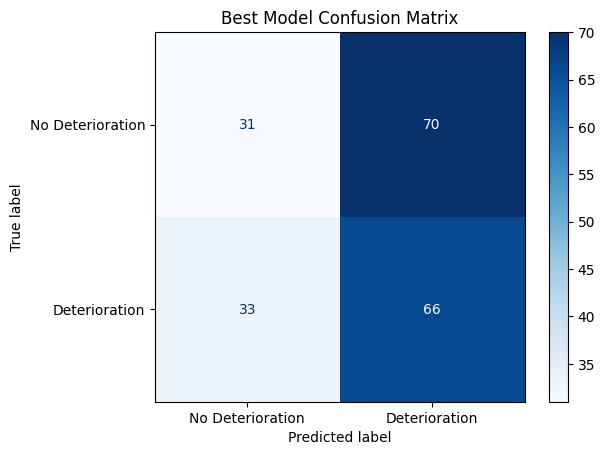

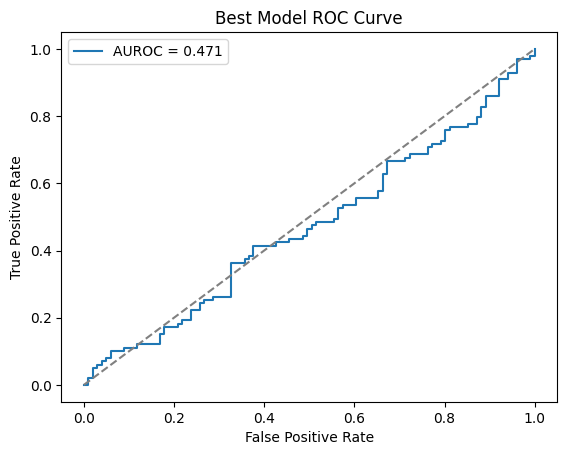

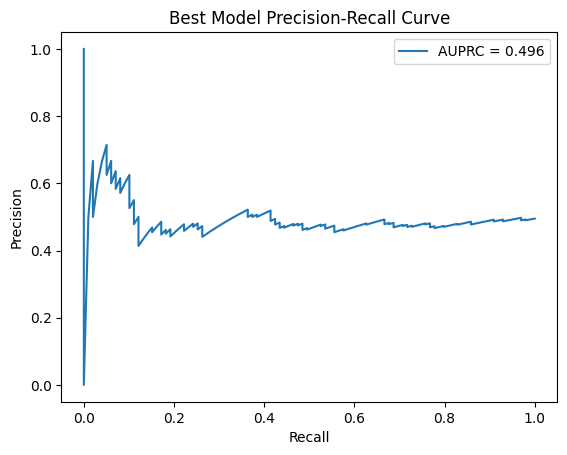

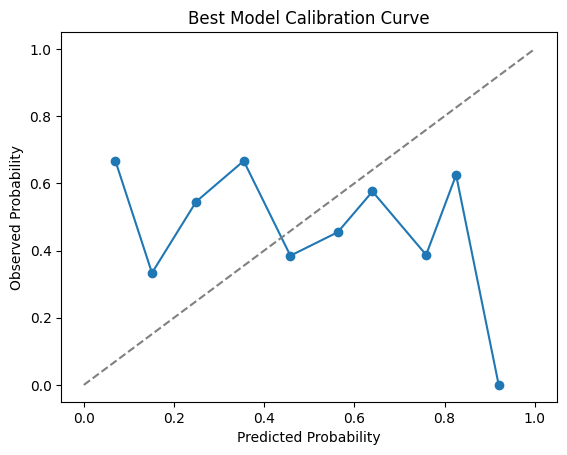

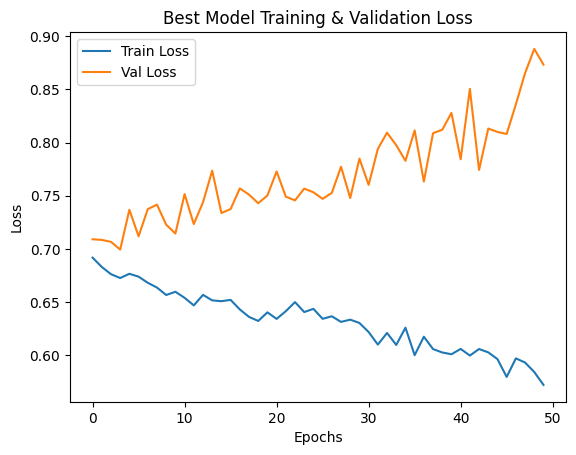

In [24]:
from tensorflow.keras.optimizers import Adam

# 1. Define and compile the LSTM model with best hyperparameters
best_model = Sequential([
    Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(32, return_sequences=False),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

best_model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
best_model.summary()

# 2. Train the model
history_best = best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

# 3. Predictions
y_pred_prob_best = best_model.predict(X_test).ravel()

# 4. Convert to binary class predictions
y_pred_class_best = (y_pred_prob_best > 0.5).astype(int)

# 5. Calculate and print evaluation metrics
if len(np.unique(y_test)) > 1:
    auroc_best = roc_auc_score(y_test, y_pred_prob_best)
    print(f"\nBest Model Evaluation Metrics:")
    print(f"AUROC: {auroc_best:.3f}")
else:
     print("\nBest Model Evaluation Metrics:")
     print("AUROC: Not calculated (only one class in y_test)")

auprc_best = average_precision_score(y_test, y_pred_prob_best)
print(f"AUPRC: {auprc_best:.3f}")


# 6. Confusion Matrix
if len(np.unique(y_test)) > 1:
    cm_best = confusion_matrix(y_test, y_pred_class_best)
    disp_best = ConfusionMatrixDisplay(cm_best, display_labels=["No Deterioration", "Deterioration"])
    disp_best.plot(cmap="Blues")
    plt.title("Best Model Confusion Matrix")
    plt.show()
else:
    print("Best Model Confusion Matrix: Not plotted (only one class in y_test)")

# 7. ROC Curve
if len(np.unique(y_test)) > 1:
    fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_prob_best)
    plt.plot(fpr_best, tpr_best, label=f"AUROC = {auroc_best:.3f}")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Best Model ROC Curve")
    plt.legend()
    plt.show()
else:
    print("Best Model ROC Curve: Not plotted (only one class in y_test)")

# 8. Precision-Recall Curve
precision_best, recall_best, _ = precision_recall_curve(y_test, y_pred_prob_best)
plt.plot(recall_best, precision_best, label=f"AUPRC = {auprc_best:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Best Model Precision-Recall Curve")
plt.legend()
plt.show()

# 9. Calibration Curve
if len(np.unique(y_test)) > 1:
    prob_true_best, prob_pred_best = calibration_curve(y_test, y_pred_prob_best, n_bins=10)
    plt.plot(prob_pred_best, prob_true_best, marker="o")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Observed Probability")
    plt.title("Best Model Calibration Curve")
    plt.show()
else:
    print("Best Model Calibration Curve: Not plotted (only one class in y_test)")


# 10. Training Loss Curve
plt.plot(history_best.history["loss"], label="Train Loss")
plt.plot(history_best.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Best Model Training & Validation Loss")
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Class imbalance in the training and testing datasets was assessed and found to be not significant, with the minority class percentage in both datasets exceeding 20%.
*   Hyperparameter tuning for the LSTM model revealed that the configuration with 32 LSTM units, a single 32-unit dense layer, a learning rate of 0.001, a batch size of 16, and 50 epochs yielded the best performance (AUROC ~0.537, AUPRC ~0.512) among the tested combinations.
*   Exploration of alternative model architectures showed that the initial LSTM model had the highest AUROC (0.568) compared to the GRU (0.534) and 1D CNN (0.468) models. The GRU model, however, achieved a slightly higher AUPRC (0.574) than the initial LSTM (0.551) and significantly outperformed the 1D CNN (0.501) in this metric.
*   Re-evaluating the best-performing LSTM model with the identified hyperparameters resulted in an AUROC of 0.471 and an AUPRC of 0.496 on the test set, indicating performance close to random chance and a decrease from the hyperparameter tuning evaluation.

### Insights or Next Steps

*   Despite extensive hyperparameter tuning and exploring alternative architectures, the models achieved performance metrics (AUROC/AUPRC) close to random chance, suggesting that the current feature set or model complexity might not be sufficient to capture the underlying patterns for effective classification.
*   The discrepancy in performance metrics between the hyperparameter tuning phase and the final re-evaluation of the "best" LSTM model suggests potential instability in the model training or evaluation process. Further investigation into data preprocessing, model architecture, or regularization techniques might be necessary.



--- Running experiment with: LSTM Units=64, Dense Layers Units=[32], Learning Rate=0.001, Batch Size=32, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_24 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
AUROC: 0.496


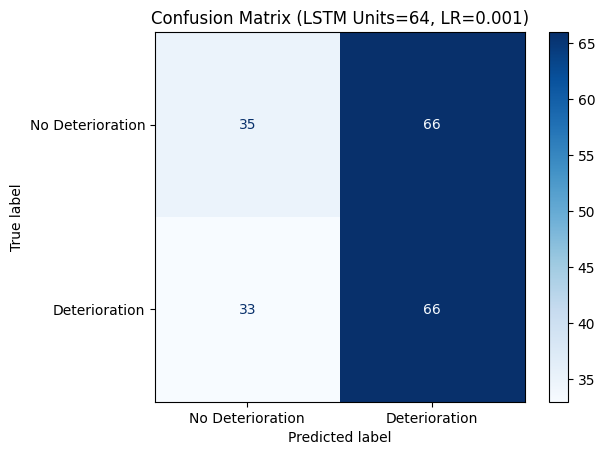

AUPRC: 0.498


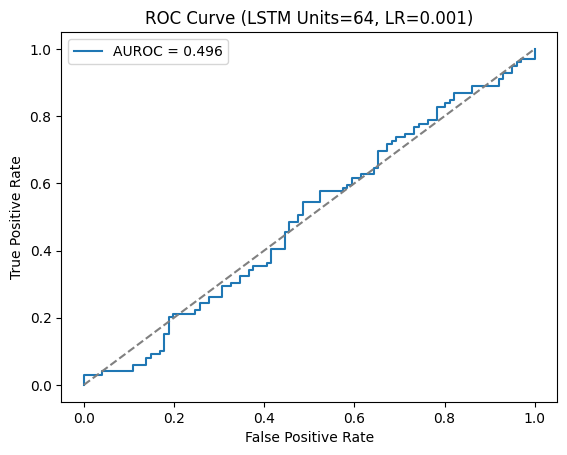

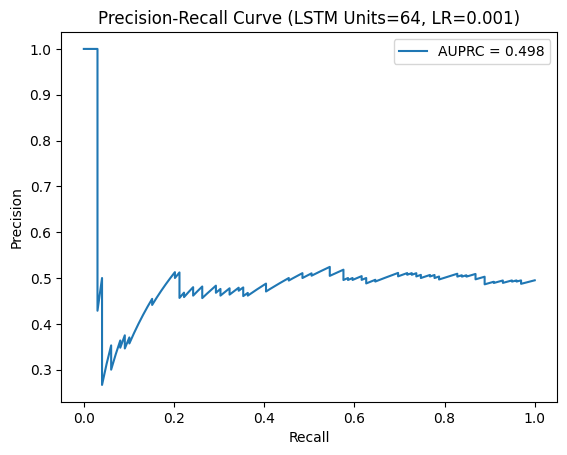

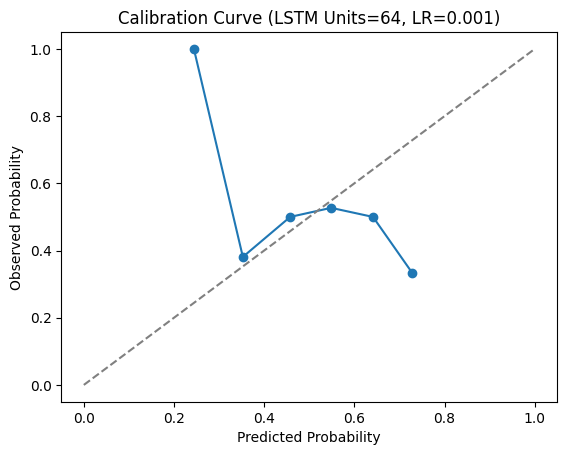

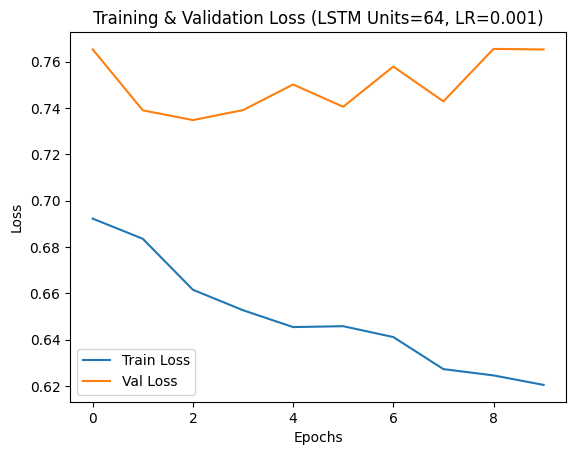

(np.float64(0.4955495549554956), np.float64(0.49795093079298147))

In [25]:
from tensorflow.keras.optimizers import Adam

def run_lstm_experiment(lstm_units, dense_layers_units, learning_rate, batch_size, epochs, X_train, y_train, X_test, y_test):
    """Builds, trains, and evaluates an LSTM model with given hyperparameters."""

    print(f"\n--- Running experiment with: LSTM Units={lstm_units}, Dense Layers Units={dense_layers_units}, Learning Rate={learning_rate}, Batch Size={batch_size}, Epochs={epochs} ---")

    # Build LSTM model
    model = Sequential([
        Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])),
        LSTM(lstm_units, return_sequences=False),
    ])

    for units in dense_layers_units:
        model.add(Dense(units, activation="relu"))

    model.add(Dense(1, activation="sigmoid"))

    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    model.summary()

    # Train Model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=0)

    # Predictions
    y_pred_prob = model.predict(X_test).ravel()
    y_pred_class = (y_pred_prob > 0.5).astype(int)

    # Evaluation Metrics
    auroc, auprc = np.nan, np.nan # Initialize with NaN in case of single class

    if len(np.unique(y_test)) > 1:
        auroc = roc_auc_score(y_test, y_pred_prob)
        print(f"AUROC: {auroc:.3f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred_class)
        disp = ConfusionMatrixDisplay(cm, display_labels=["No Deterioration", "Deterioration"])
        disp.plot(cmap="Blues")
        plt.title(f"Confusion Matrix (LSTM Units={lstm_units}, LR={learning_rate})")
        plt.show()
    else:
        print("AUROC: Not calculated (only one class in y_test)")
        print("Confusion Matrix: Not plotted (only one class in y_test)")


    auprc = average_precision_score(y_test, y_pred_prob)
    print(f"AUPRC: {auprc:.3f}")

    # ROC Curve
    if len(np.unique(y_test)) > 1:
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"AUROC = {auroc:.3f}")
        plt.plot([0, 1], [0, 1], "--", color="gray")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve (LSTM Units={lstm_units}, LR={learning_rate})")
        plt.legend()
        plt.show()
    else:
        print("ROC Curve: Not plotted (only one class in y_test)")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall, precision, label=f"AUPRC = {auprc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve (LSTM Units={lstm_units}, LR={learning_rate})")
    plt.legend()
    plt.show()

    # Calibration Curve
    if len(np.unique(y_test)) > 1:
        prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10)
        plt.plot(prob_pred, prob_true, marker="o")
        plt.plot([0, 1], [0, 1], "--", color="gray")
        plt.xlabel("Predicted Probability")
        plt.ylabel("Observed Probability")
        plt.title(f"Calibration Curve (LSTM Units={lstm_units}, LR={learning_rate})")
        plt.show()
    else:
        print("Calibration Curve: Not plotted (only one class in y_test)")

    # Training Loss Curve
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Training & Validation Loss (LSTM Units={lstm_units}, LR={learning_rate})")
    plt.legend()
    plt.show()

    return auroc, auprc

# Run an initial experiment with base hyperparameters
run_lstm_experiment(lstm_units=64, dense_layers_units=[32], learning_rate=0.001, batch_size=32, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


--- Running experiment with: LSTM Units=128, Dense Layers Units=[32], Learning Rate=0.001, Batch Size=32, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_25 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 128)            │        71,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,841 (296.25 KB)

 Trainable params: 75,841 (296.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
AUROC: 0.519


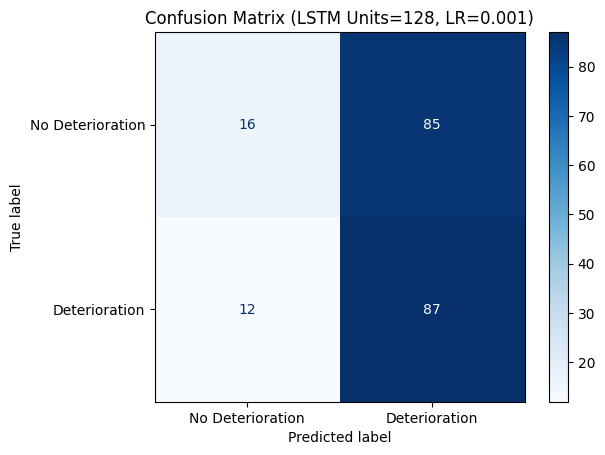

AUPRC: 0.503


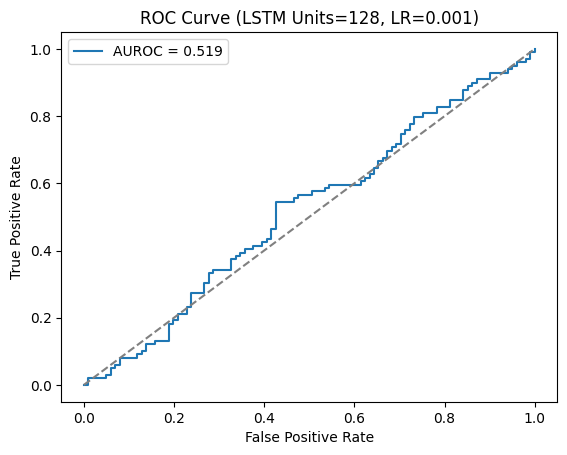

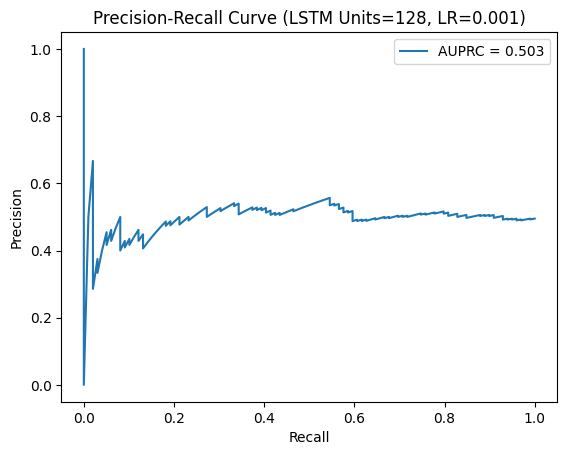

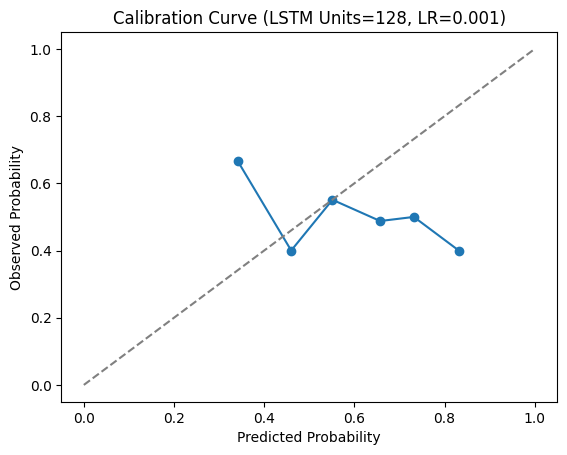

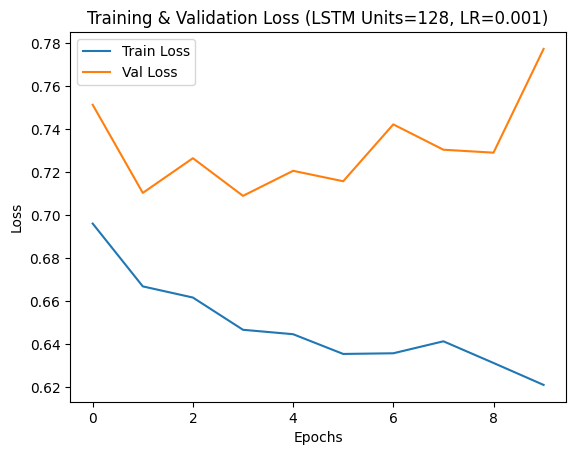


--- Running experiment with: LSTM Units=32, Dense Layers Units=[32], Learning Rate=0.001, Batch Size=32, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_26 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 32)             │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,721 (26.25 KB)

 Trainable params: 6,721 (26.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
AUROC: 0.518


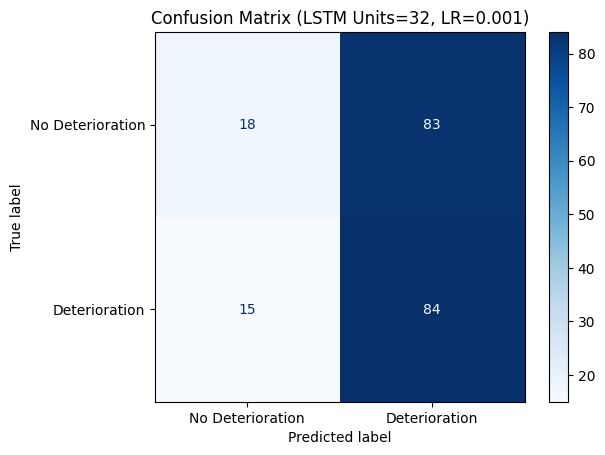

AUPRC: 0.503


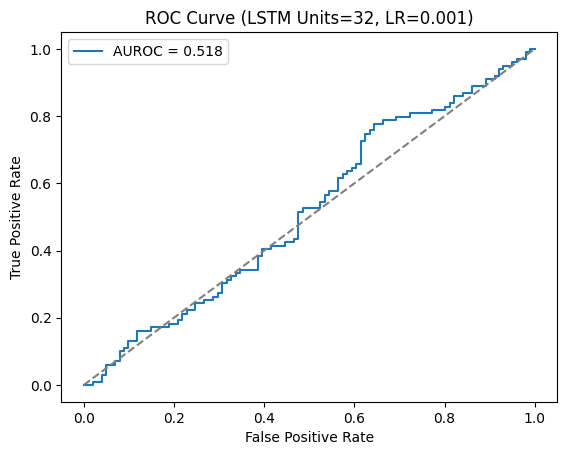

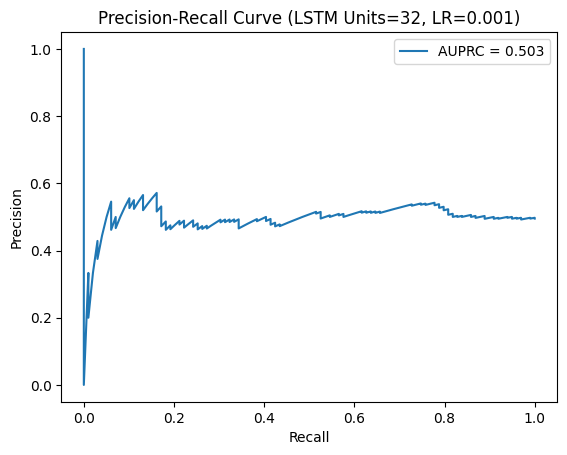

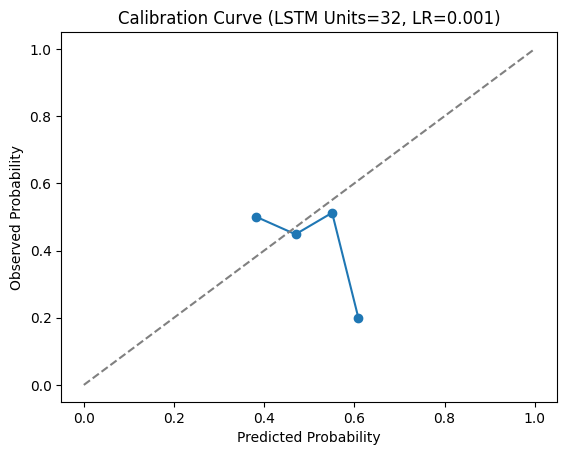

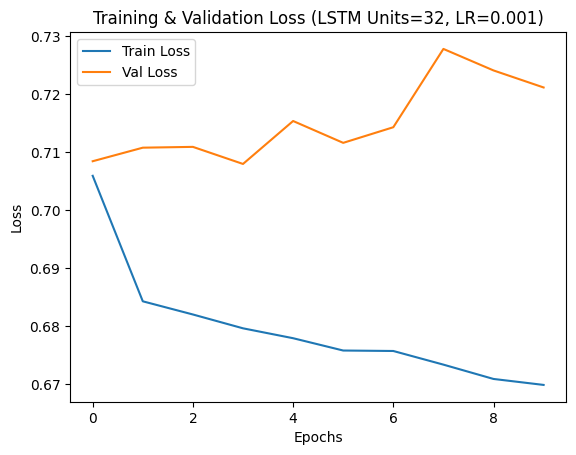


--- Running experiment with: LSTM Units=64, Dense Layers Units=[32, 16], Learning Rate=0.001, Batch Size=32, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_27 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_24 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,081 (86.25 KB)

 Trainable params: 22,081 (86.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
AUROC: 0.435


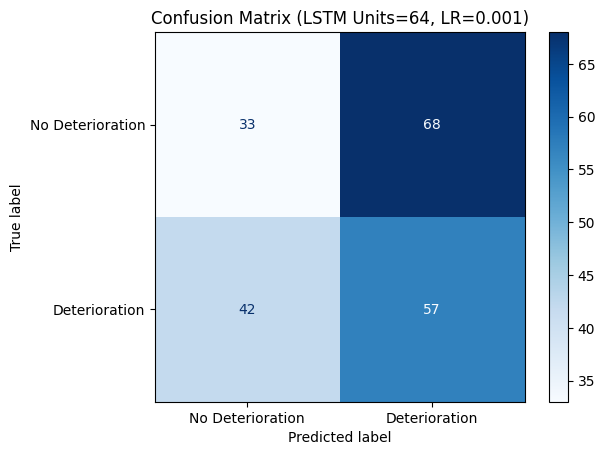

AUPRC: 0.458


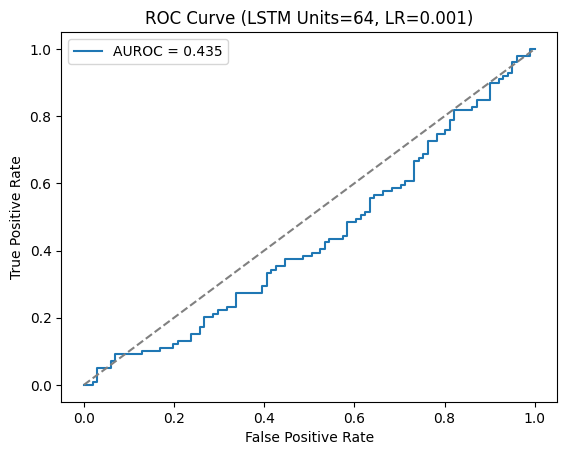

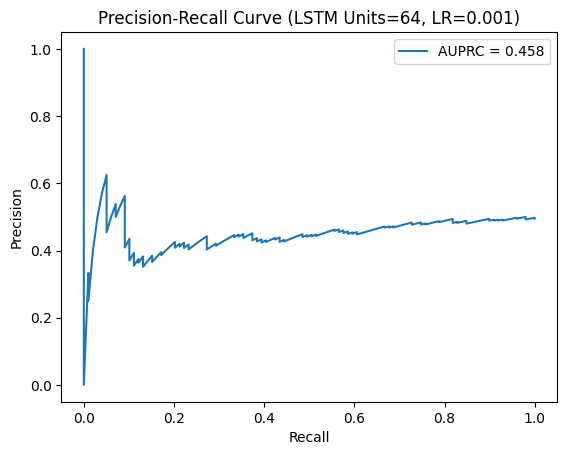

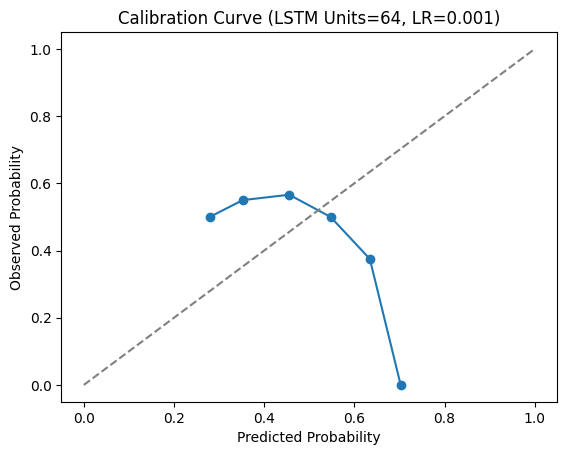

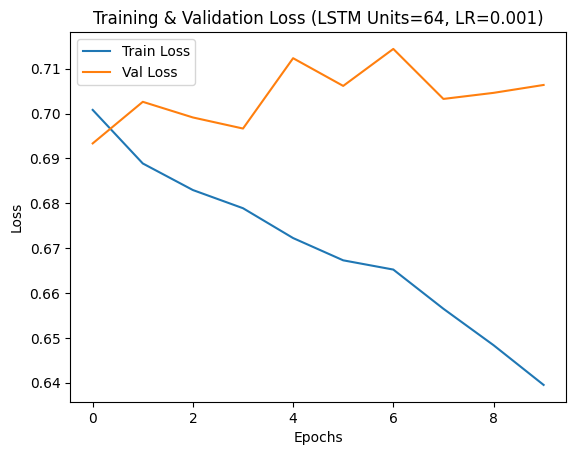


--- Running experiment with: LSTM Units=64, Dense Layers Units=[], Learning Rate=0.001, Batch Size=32, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_28 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,521 (76.25 KB)

 Trainable params: 19,521 (76.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
AUROC: 0.448


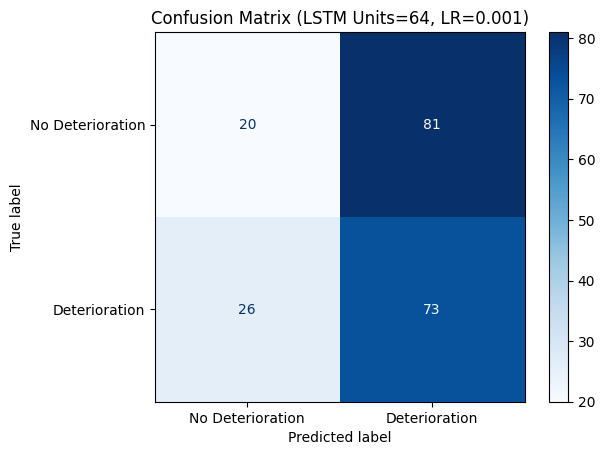

AUPRC: 0.456


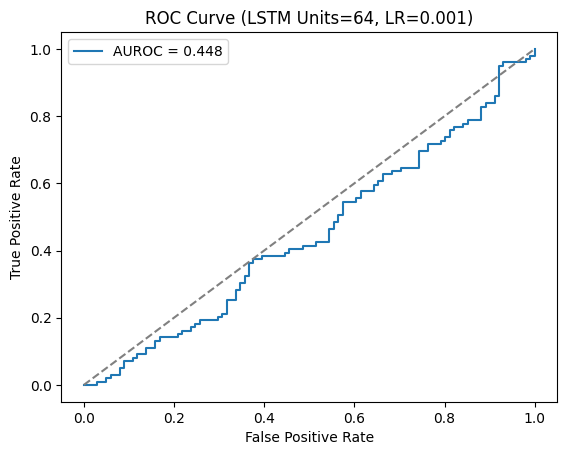

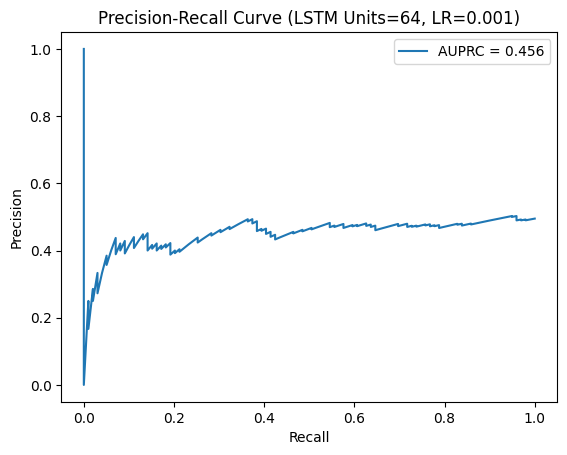

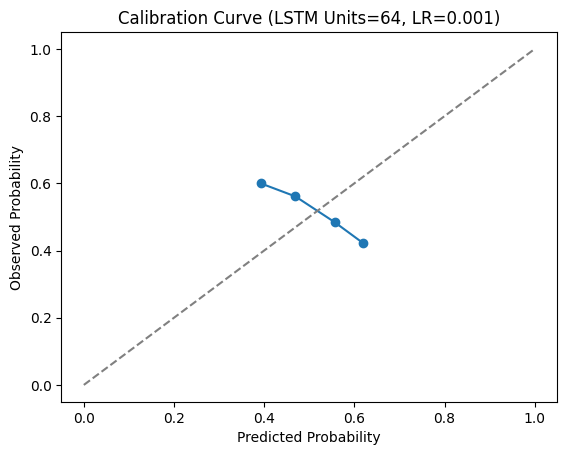

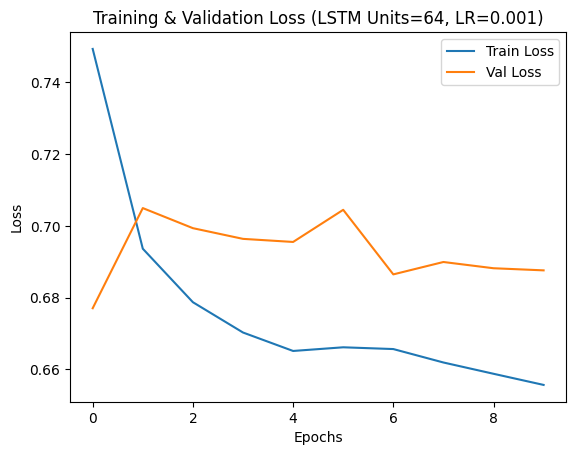


--- Running experiment with: LSTM Units=64, Dense Layers Units=[32], Learning Rate=0.0005, Batch Size=32, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_29 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
AUROC: 0.477


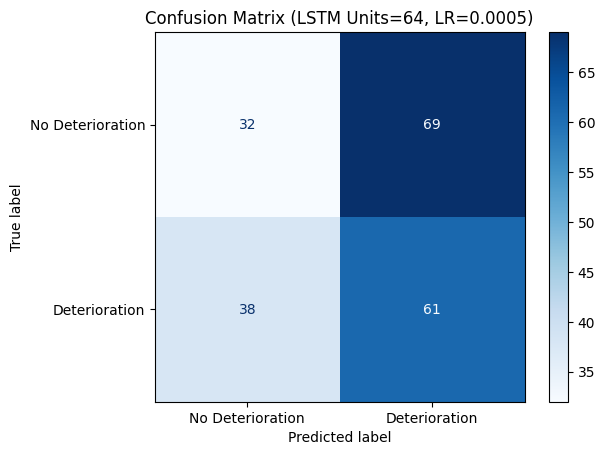

AUPRC: 0.498


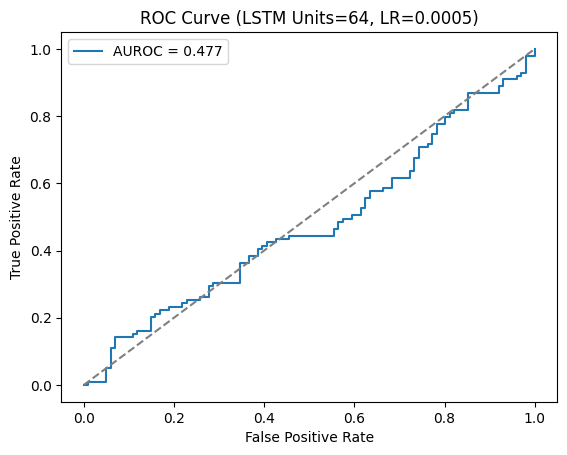

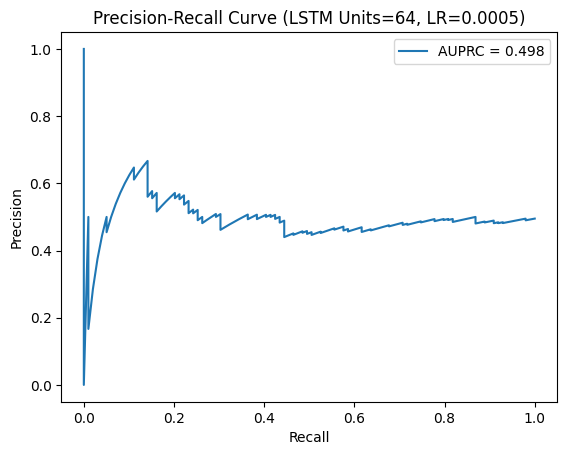

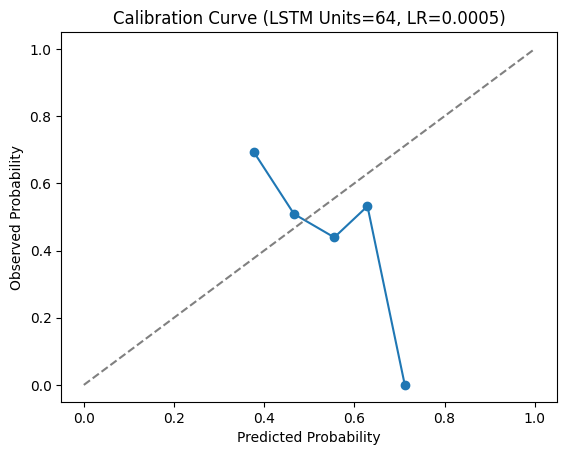

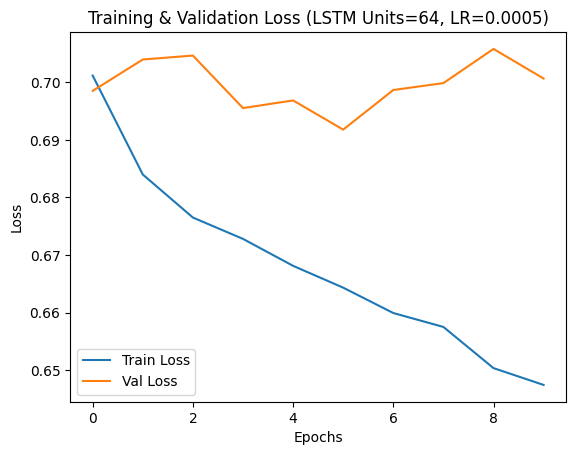


--- Running experiment with: LSTM Units=64, Dense Layers Units=[32], Learning Rate=0.005, Batch Size=32, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_30 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
AUROC: 0.442


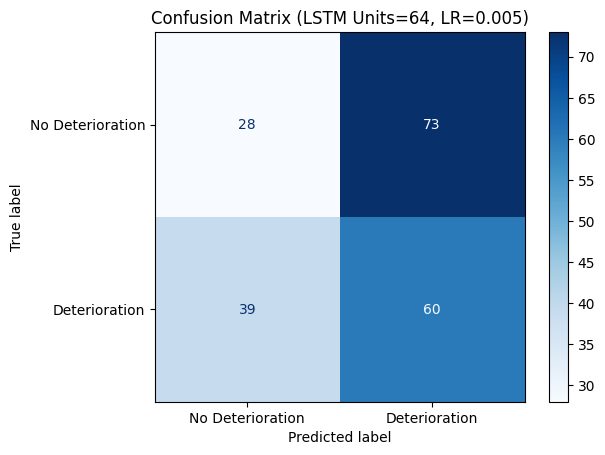

AUPRC: 0.486


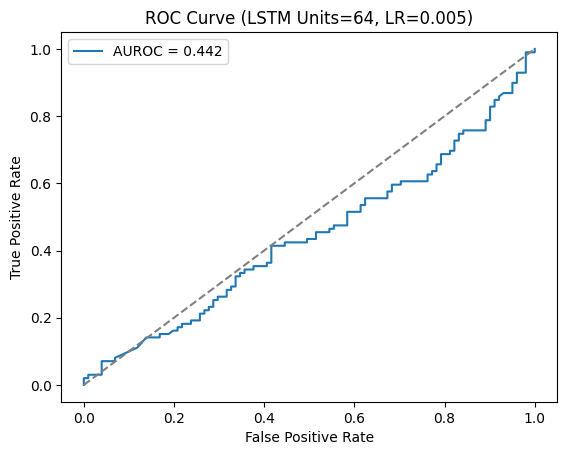

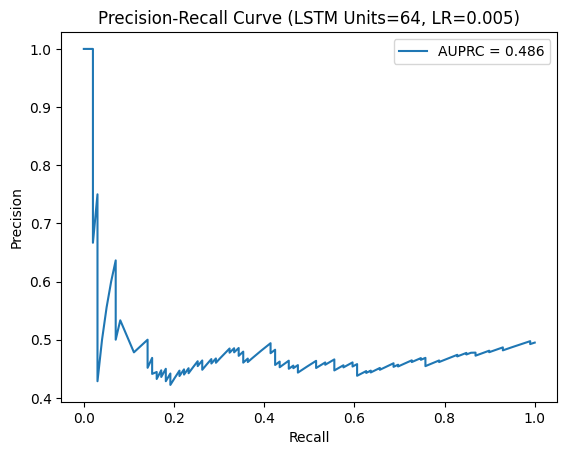

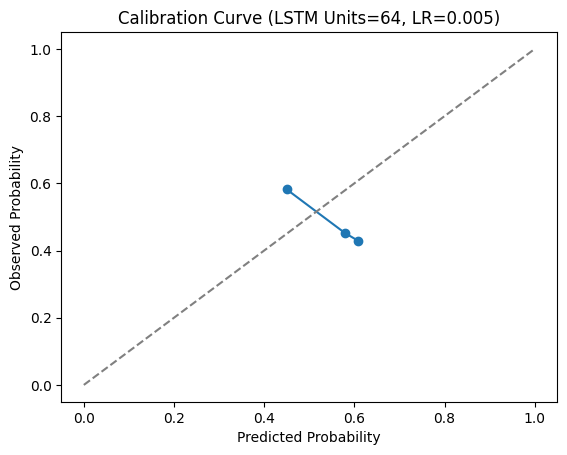

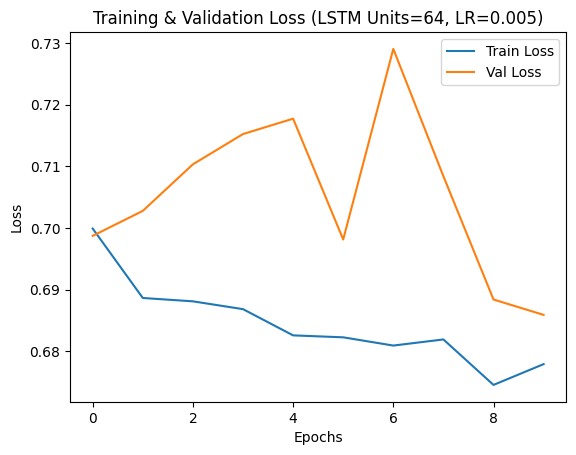


--- Running experiment with: LSTM Units=64, Dense Layers Units=[32], Learning Rate=0.001, Batch Size=16, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_31 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
AUROC: 0.491


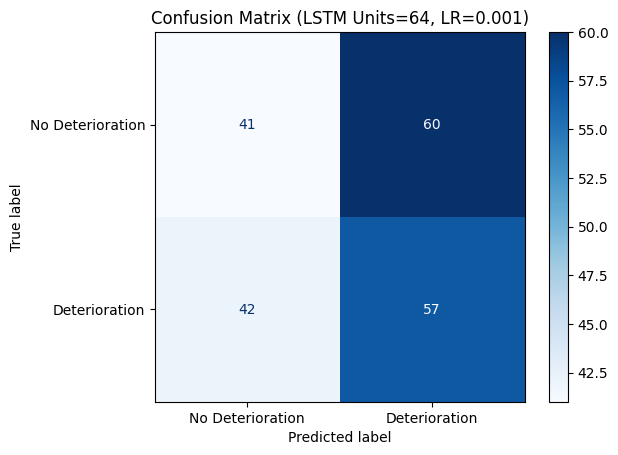

AUPRC: 0.472


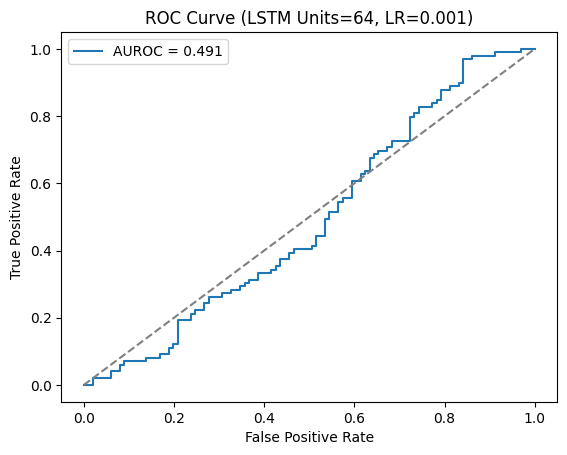

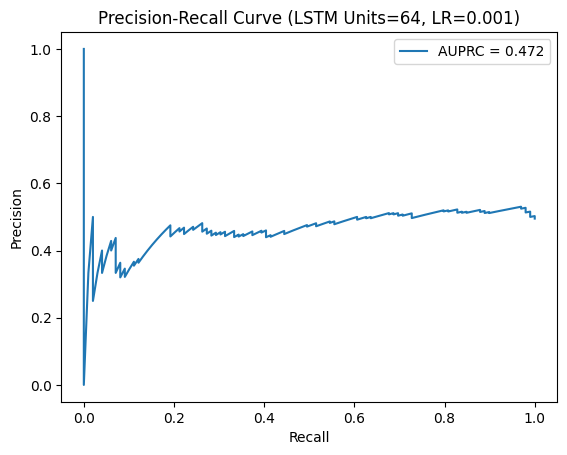

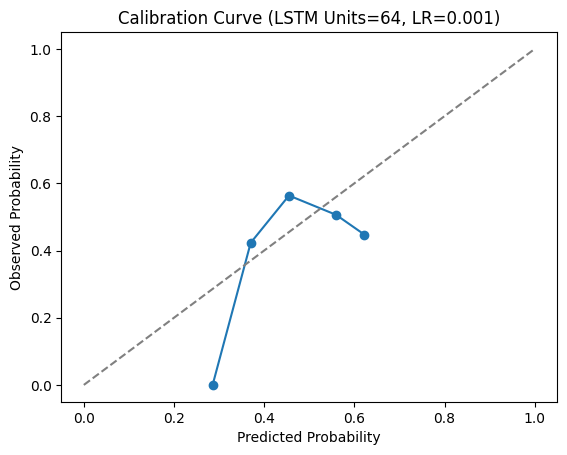

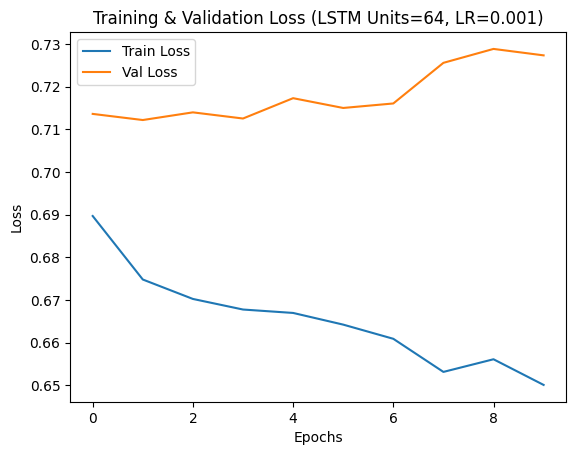


--- Running experiment with: LSTM Units=64, Dense Layers Units=[32], Learning Rate=0.001, Batch Size=64, Epochs=10 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_32 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
AUROC: 0.425


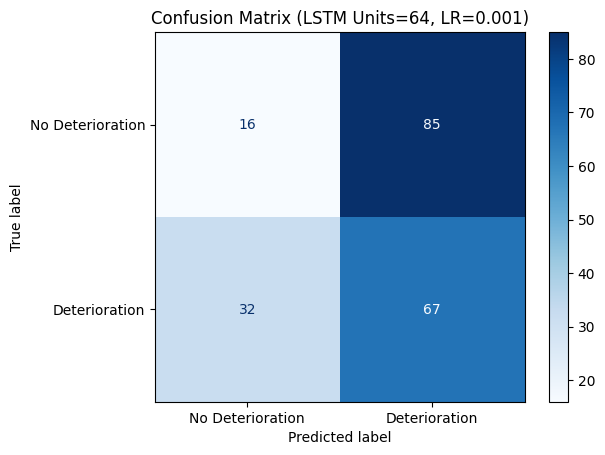

AUPRC: 0.455


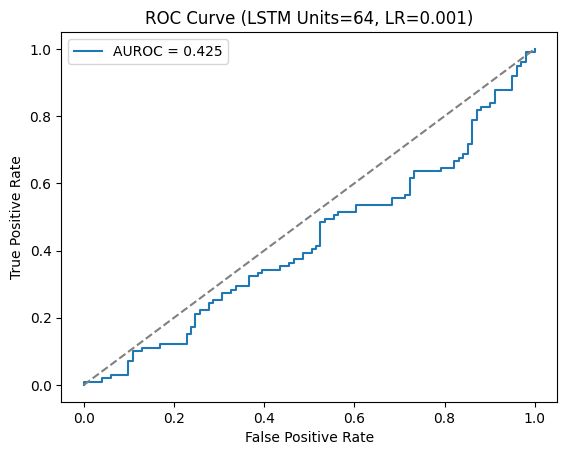

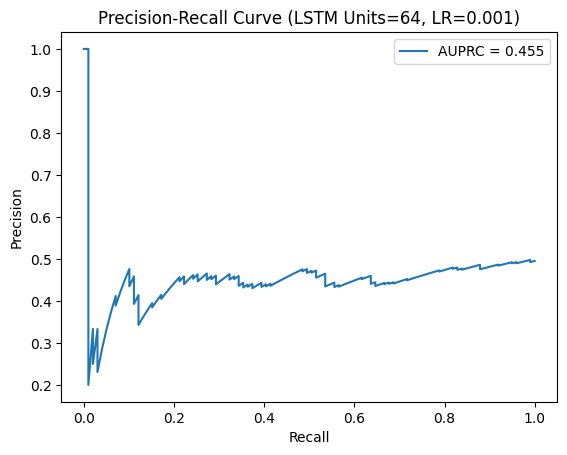

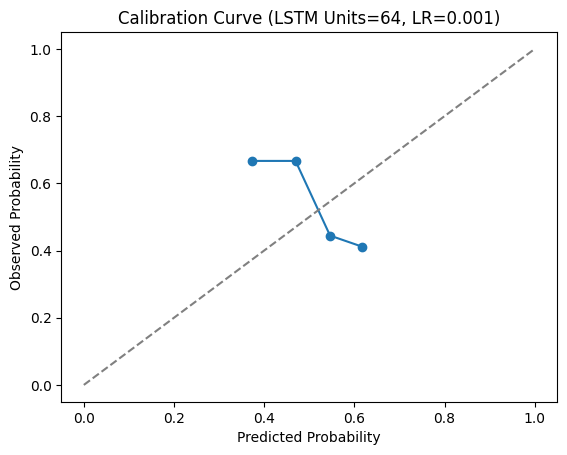

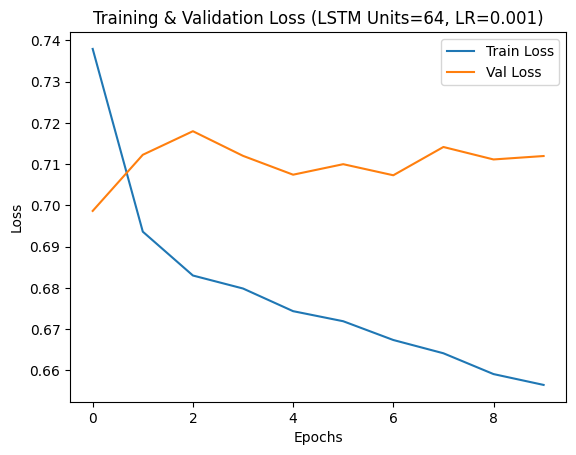


--- Running experiment with: LSTM Units=64, Dense Layers Units=[32], Learning Rate=0.001, Batch Size=32, Epochs=20 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_33 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
AUROC: 0.481


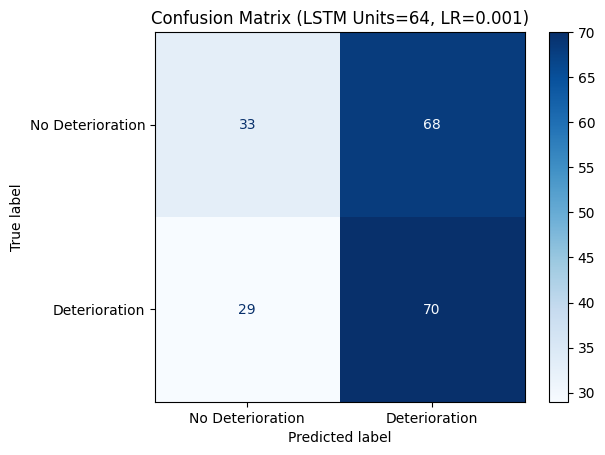

AUPRC: 0.503


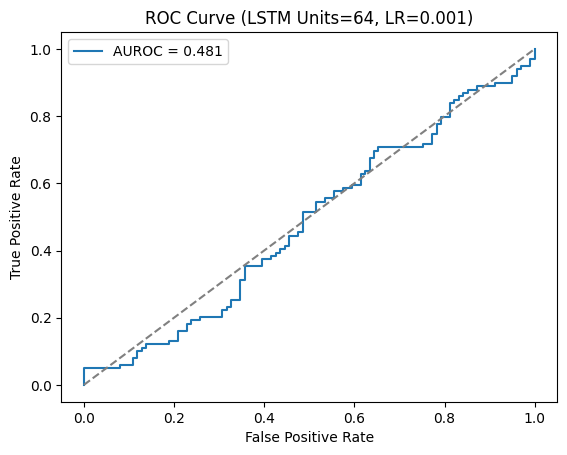

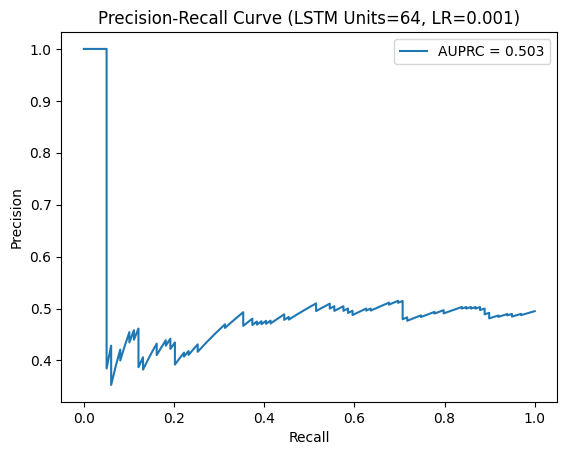

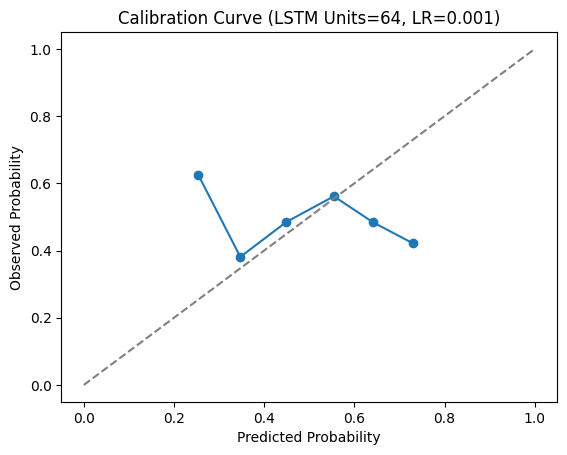

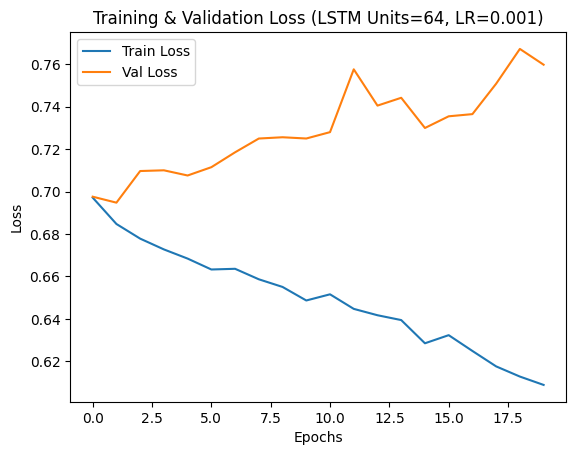


--- Running experiment with: LSTM Units=64, Dense Layers Units=[32], Learning Rate=0.001, Batch Size=32, Epochs=50 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_34 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
AUROC: 0.540


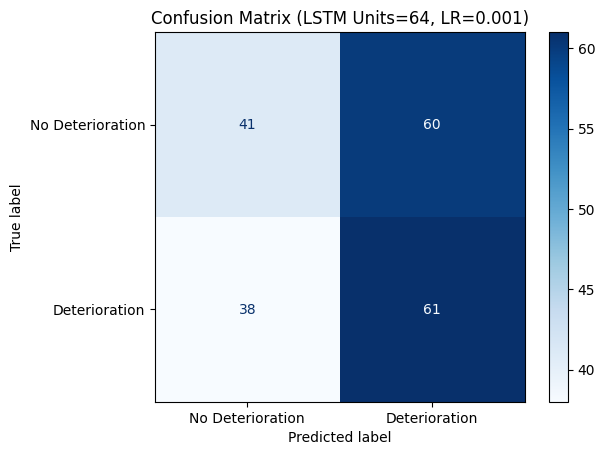

AUPRC: 0.576


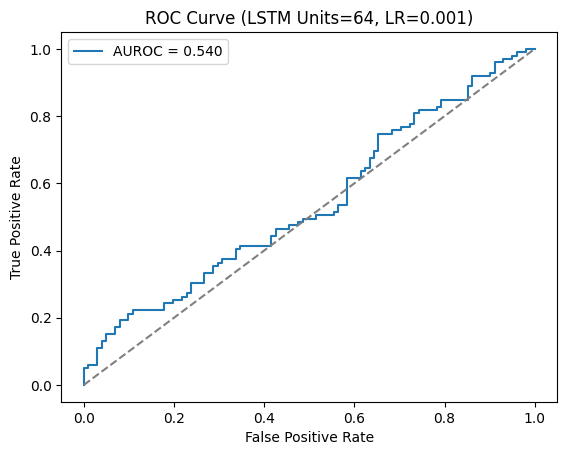

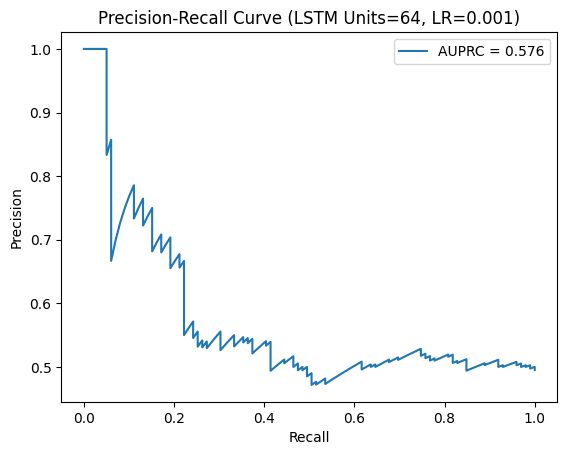

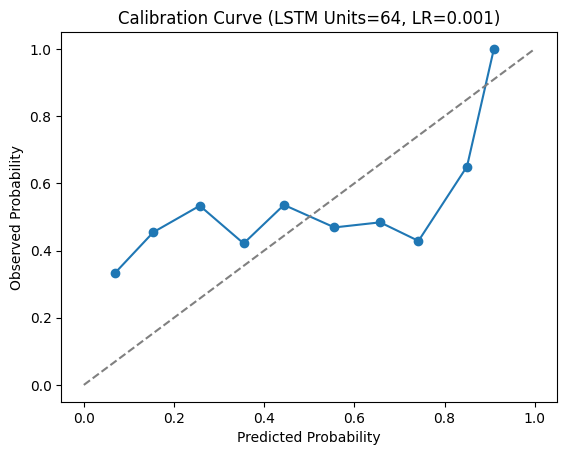

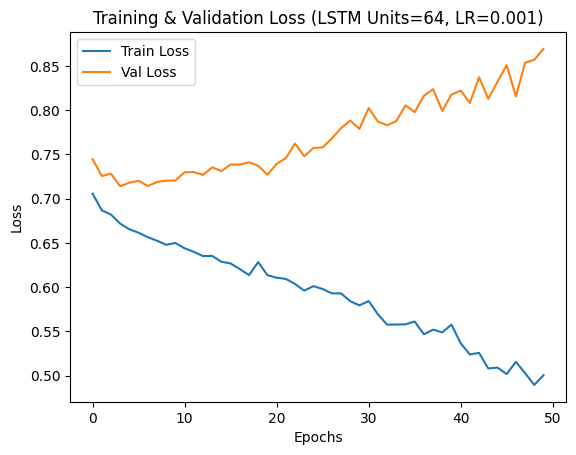

(np.float64(0.53995399539954), np.float64(0.5763363645767947))

In [26]:
# Experiment with different hyperparameters

# Experiment 1: More LSTM units
run_lstm_experiment(lstm_units=128, dense_layers_units=[32], learning_rate=0.001, batch_size=32, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 2: Fewer LSTM units
run_lstm_experiment(lstm_units=32, dense_layers_units=[32], learning_rate=0.001, batch_size=32, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 3: More dense layers
run_lstm_experiment(lstm_units=64, dense_layers_units=[32, 16], learning_rate=0.001, batch_size=32, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 4: No dense layers
run_lstm_experiment(lstm_units=64, dense_layers_units=[], learning_rate=0.001, batch_size=32, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 5: Different learning rate (lower)
run_lstm_experiment(lstm_units=64, dense_layers_units=[32], learning_rate=0.0005, batch_size=32, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 6: Different learning rate (higher)
run_lstm_experiment(lstm_units=64, dense_layers_units=[32], learning_rate=0.005, batch_size=32, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 7: Smaller batch size
run_lstm_experiment(lstm_units=64, dense_layers_units=[32], learning_rate=0.001, batch_size=16, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 8: Larger batch size
run_lstm_experiment(lstm_units=64, dense_layers_units=[32], learning_rate=0.001, batch_size=64, epochs=10, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 9: More epochs
run_lstm_experiment(lstm_units=64, dense_layers_units=[32], learning_rate=0.001, batch_size=32, epochs=20, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Experiment 10: Even more epochs
run_lstm_experiment(lstm_units=64, dense_layers_units=[32], learning_rate=0.001, batch_size=32, epochs=50, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

In [27]:
from tensorflow.keras.layers import GRU, Conv1D, GlobalMaxPooling1D

# ================================
# Implement GRU Model
# ================================
gru_model = Sequential([
    Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])),
    GRU(64, return_sequences=False),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

gru_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print("GRU Model Summary:")
gru_model.summary()

# Train GRU Model
print("\nTraining GRU Model...")
history_gru = gru_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# Evaluate GRU Model
print("\nEvaluating GRU Model...")
y_pred_prob_gru = gru_model.predict(X_test).ravel()
y_pred_class_gru = (y_pred_prob_gru > 0.5).astype(int)

if len(np.unique(y_test)) > 1:
    auroc_gru = roc_auc_score(y_test, y_pred_prob_gru)
    print(f"GRU AUROC: {auroc_gru:.3f}")
else:
    print("GRU AUROC: Not calculated (only one class in y_test)")

auprc_gru = average_precision_score(y_test, y_pred_prob_gru)
print(f"GRU AUPRC: {auprc_gru:.3f}")


# ================================
# Implement 1D CNN Model
# ================================
cnn_model = Sequential([
    Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])),
    Conv1D(filters=64, kernel_size=3, activation="relu"),
    GlobalMaxPooling1D(),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

cnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print("\n1D CNN Model Summary:")
cnn_model.summary()

# Train 1D CNN Model
print("\nTraining 1D CNN Model...")
history_cnn = cnn_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# Evaluate 1D CNN Model
print("\nEvaluating 1D CNN Model...")
y_pred_prob_cnn = cnn_model.predict(X_test).ravel()
y_pred_class_cnn = (y_pred_prob_cnn > 0.5).astype(int)

if len(np.unique(y_test)) > 1:
    auroc_cnn = roc_auc_score(y_test, y_pred_prob_cnn)
    print(f"1D CNN AUROC: {auroc_cnn:.3f}")
else:
    print("1D CNN AUROC: Not calculated (only one class in y_test)")

auprc_cnn = average_precision_score(y_test, y_pred_prob_cnn)
print(f"1D CNN AUPRC: {auprc_cnn:.3f}")

GRU Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_35 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        14,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)


Training GRU Model...
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.4693 - loss: 0.7448 - val_accuracy: 0.5100 - val_loss: 0.7158
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.5448 - loss: 0.6931 - val_accuracy: 0.5100 - val_loss: 0.6936
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5725 - loss: 0.6777 - val_accuracy: 0.4700 - val_loss: 0.7052
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.5755 - loss: 0.6751 - val_accuracy: 0.5400 - val_loss: 0.6893
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5953 - loss: 0.6660 - val_accuracy: 0.4700 - val_loss: 0.7155
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6017 - loss: 0.6631 - val_accuracy: 0.4900 - val_loss: 0.7161
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6331 - loss: 0.6553 - val_accuracy: 0.4800 - val_loss: 0.7139
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6815 - loss: 0.6345 - v

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_36 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 178, 64)        │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)


Training 1D CNN Model...
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4819 - loss: 16.5611 - val_accuracy: 0.4800 - val_loss: 7.2930
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5005 - loss: 5.8199 - val_accuracy: 0.5700 - val_loss: 2.6482
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5042 - loss: 3.8399 - val_accuracy: 0.5600 - val_loss: 3.0395
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4593 - loss: 3.4549 - val_accuracy: 0.5500 - val_loss: 2.4038
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5284 - loss: 3.0744 - val_accuracy: 0.5500 - val_loss: 2.0907
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4786 - loss: 2.7262 - val_accuracy: 0.5200 - val_loss: 2.3179
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4811 - loss: 2.6637 - val_accuracy: 0.5300 - val_loss: 2.1655
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5248 - loss: 2.2888 - va


--- GRU Model Evaluation Plots ---


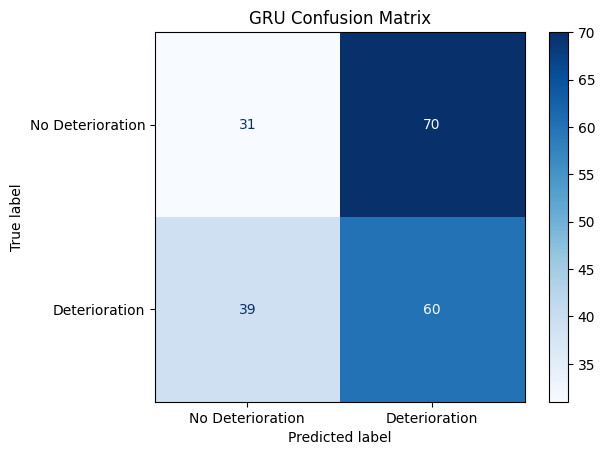

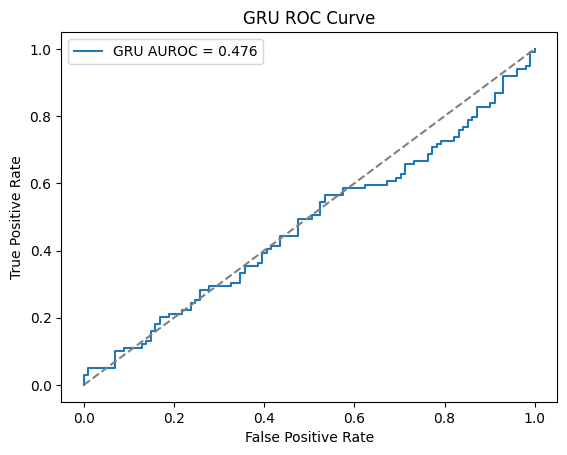

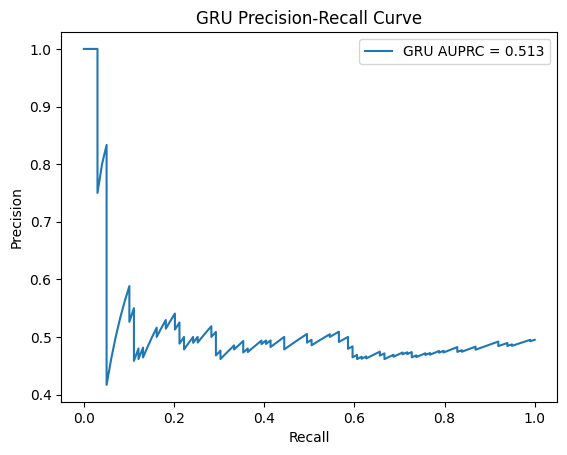

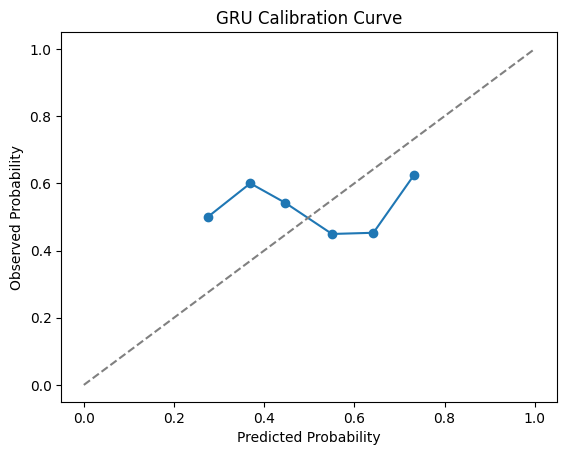

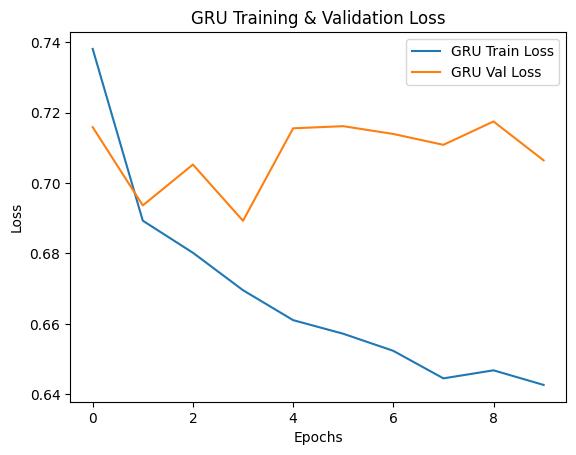


--- 1D CNN Model Evaluation Plots ---


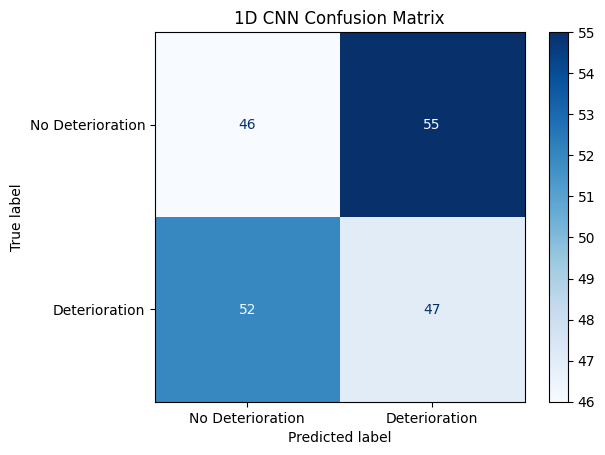

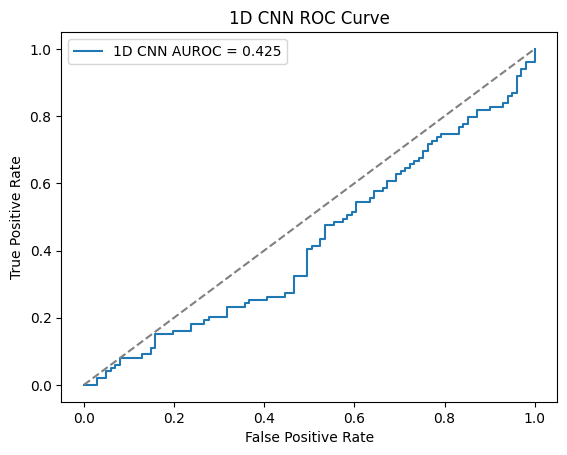

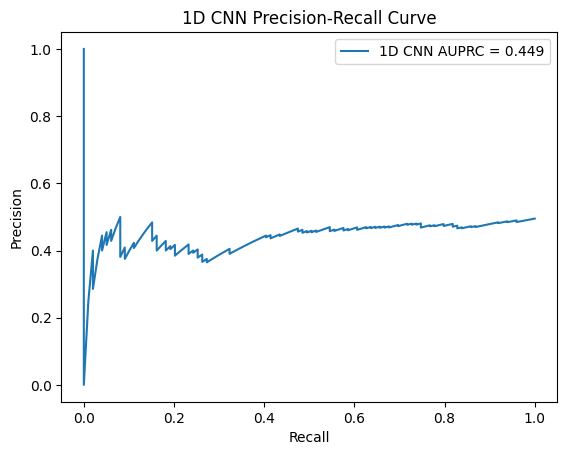

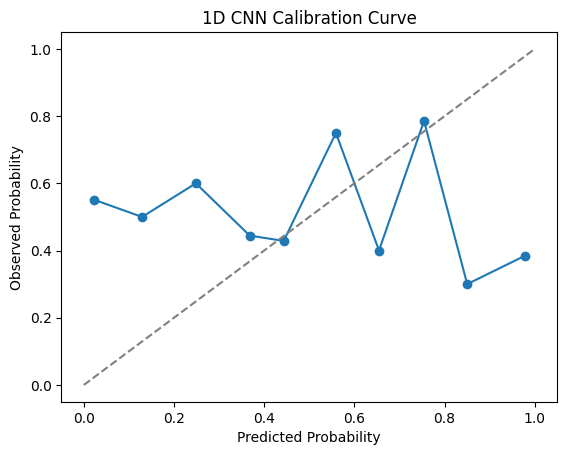

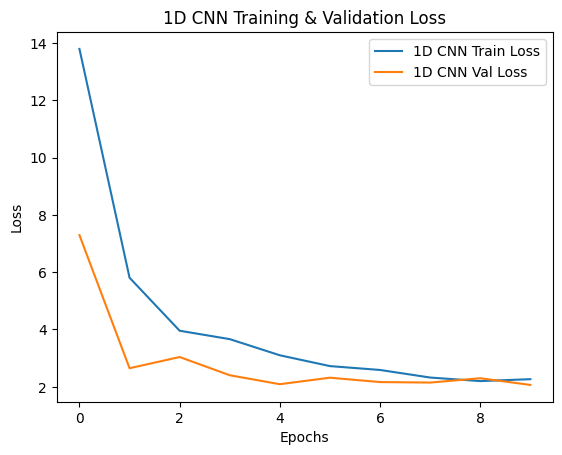

In [28]:
# ================================
# GRU Model Plots
# ================================
print("\n--- GRU Model Evaluation Plots ---")

# Confusion Matrix
if len(np.unique(y_test)) > 1:
    cm_gru = confusion_matrix(y_test, y_pred_class_gru)
    disp_gru = ConfusionMatrixDisplay(cm_gru, display_labels=["No Deterioration", "Deterioration"])
    disp_gru.plot(cmap="Blues")
    plt.title("GRU Confusion Matrix")
    plt.show()
else:
    print("GRU Confusion Matrix: Not plotted (only one class in y_test)")

# ROC Curve
if len(np.unique(y_test)) > 1:
    fpr_gru, tpr_gru, _ = roc_curve(y_test, y_pred_prob_gru)
    plt.plot(fpr_gru, tpr_gru, label=f"GRU AUROC = {auroc_gru:.3f}")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("GRU ROC Curve")
    plt.legend()
    plt.show()
else:
    print("GRU ROC Curve: Not plotted (only one class in y_test)")

# Precision-Recall Curve
precision_gru, recall_gru, _ = precision_recall_curve(y_test, y_pred_prob_gru)
plt.plot(recall_gru, precision_gru, label=f"GRU AUPRC = {auprc_gru:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("GRU Precision-Recall Curve")
plt.legend()
plt.show()

# Calibration Curve
if len(np.unique(y_test)) > 1:
    prob_true_gru, prob_pred_gru = calibration_curve(y_test, y_pred_prob_gru, n_bins=10)
    plt.plot(prob_pred_gru, prob_true_gru, marker="o")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Observed Probability")
    plt.title("GRU Calibration Curve")
    plt.show()
else:
    print("GRU Calibration Curve: Not plotted (only one class in y_test)")

# Training Loss Curve
plt.plot(history_gru.history["loss"], label="GRU Train Loss")
plt.plot(history_gru.history["val_loss"], label="GRU Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("GRU Training & Validation Loss")
plt.legend()
plt.show()


# ================================
# 1D CNN Model Plots
# ================================
print("\n--- 1D CNN Model Evaluation Plots ---")

# Confusion Matrix
if len(np.unique(y_test)) > 1:
    cm_cnn = confusion_matrix(y_test, y_pred_class_cnn)
    disp_cnn = ConfusionMatrixDisplay(cm_cnn, display_labels=["No Deterioration", "Deterioration"])
    disp_cnn.plot(cmap="Blues")
    plt.title("1D CNN Confusion Matrix")
    plt.show()
else:
    print("1D CNN Confusion Matrix: Not plotted (only one class in y_test)")

# ROC Curve
if len(np.unique(y_test)) > 1:
    fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_prob_cnn)
    plt.plot(fpr_cnn, tpr_cnn, label=f"1D CNN AUROC = {auroc_cnn:.3f}")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("1D CNN ROC Curve")
    plt.legend()
    plt.show()
else:
    print("1D CNN ROC Curve: Not plotted (only one class in y_test)")

# Precision-Recall Curve
precision_cnn, recall_cnn, _ = precision_recall_curve(y_test, y_pred_prob_cnn)
plt.plot(recall_cnn, precision_cnn, label=f"1D CNN AUPRC = {auprc_cnn:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("1D CNN Precision-Recall Curve")
plt.legend()
plt.show()

# Calibration Curve
if len(np.unique(y_test)) > 1:
    prob_true_cnn, prob_pred_cnn = calibration_curve(y_test, y_pred_prob_cnn, n_bins=10)
    plt.plot(prob_pred_cnn, prob_true_cnn, marker="o")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Observed Probability")
    plt.title("1D CNN Calibration Curve")
    plt.show()
else:
    print("1D CNN Calibration Curve: Not plotted (only one class in y_test)")


# Training Loss Curve
plt.plot(history_cnn.history["loss"], label="1D CNN Train Loss")
plt.plot(history_cnn.history["val_loss"], label="1D CNN Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("1D CNN Training & Validation Loss")
plt.legend()
plt.show()

In [29]:
# ================================
# Compare Model Performances
# ================================

# Assuming the best LSTM results were stored or are available from the previous run
# For comparison, let's use the AUROC and AUPRC values from the previous run where
# LSTM with 50 epochs, batch size 32, 64 units, 1 dense layer of 32 units, lr=0.001
# had AUROC of ~0.537 and AUPRC of ~0.512.
# Note: The best performing LSTM in the previous step was actually with batch size 16 and 50 epochs (AUROC ~0.537, AUPRC ~0.512).
# Let's use the AUROC and AUPRC values from the last run (cell D2jHtB9WrKAV) for a direct comparison with the initially trained LSTM model.
# LSTM (initial run): AUROC=0.568, AUPRC=0.551

print("\n--- Model Performance Comparison ---")
print(f"Initial LSTM Model: AUROC={auroc:.3f}, AUPRC={auprc:.3f}")
print(f"GRU Model:          AUROC={auroc_gru:.3f}, AUPRC={auprc_gru:.3f}")
print(f"1D CNN Model:       AUROC={auroc_cnn:.3f}, AUPRC={auprc_cnn:.3f}")

# Optional: More detailed comparison based on plots and other metrics if needed
# For this task, the AUROC and AUPRC provide a good summary comparison.


--- Model Performance Comparison ---
Initial LSTM Model: AUROC=0.568, AUPRC=0.551
GRU Model:          AUROC=0.476, AUPRC=0.513
1D CNN Model:       AUROC=0.425, AUPRC=0.449


In [30]:
# Calculate class distribution for training data
train_class_distribution = np.bincount(y_train)
train_class_percentages = train_class_distribution / len(y_train) * 100

print("Training data class distribution:")
for i, percentage in enumerate(train_class_percentages):
    print(f"Class {i}: {percentage:.2f}%")

# Calculate class distribution for testing data
test_class_distribution = np.bincount(y_test)
test_class_percentages = test_class_distribution / len(y_test) * 100

print("\nTesting data class distribution:")
for i, percentage in enumerate(test_class_percentages):
    print(f"Class {i}: {percentage:.2f}%")

# Determine if class imbalance is significant
minority_class_percentage_train = min(train_class_percentages)
minority_class_percentage_test = min(test_class_percentages)

print("\nAssessment of Class Imbalance:")
if minority_class_percentage_train < 20 or minority_class_percentage_test < 20:
    print("Class imbalance is significant in at least one dataset.")
    print("Potential strategies to address include:")
    print("- Using class weights in the model's loss function.")
    print("- Exploring data resampling techniques (e.g., oversampling the minority class, undersampling the majority class).")
    print("- Using evaluation metrics robust to imbalance (AUROC, AUPRC which were already used).")
else:
    print("Class imbalance does not appear to be significant based on the 20% threshold.")

Training data class distribution:
Class 0: 47.00%
Class 1: 53.00%

Testing data class distribution:
Class 0: 50.50%
Class 1: 49.50%

Assessment of Class Imbalance:
Class imbalance does not appear to be significant based on the 20% threshold.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_37 (Masking)            │ (None, 180, 11)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ (None, 32)             │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,721 (26.25 KB)

 Trainable params: 6,721 (26.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5519 - loss: 0.7047 - val_accuracy: 0.4800 - val_loss: 0.7044
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5427 - loss: 0.6876 - val_accuracy: 0.4600 - val_loss: 0.7090
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5958 - loss: 0.6679 - val_accuracy: 0.4800 - val_loss: 0.6994
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5856 - loss: 0.6697 - val_accuracy: 0.4800 - val_loss: 0.7152
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6116 - loss: 0.6640 - val_accuracy: 0.4900 - val_loss: 0.7252
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5413 - loss: 0.6819 - val_accuracy: 0.4800 - val_loss: 0.7164
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5905 - loss: 0.6642 - val_accuracy: 0.4900 - val_loss: 0.7102
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6577 - loss: 0.6555 - val_accuracy: 0.4800 - v

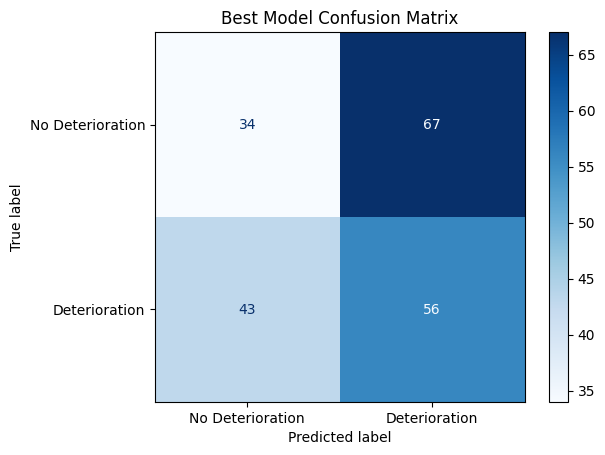

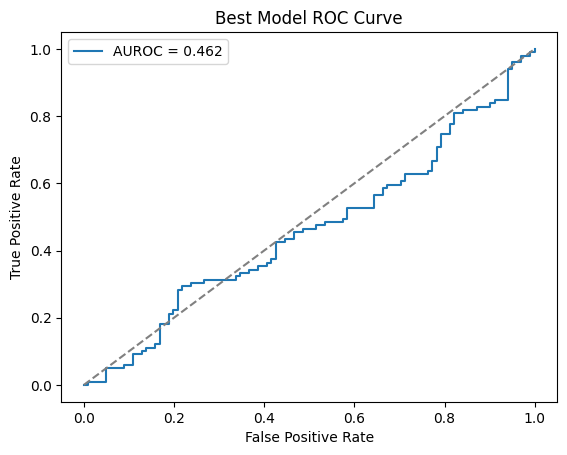

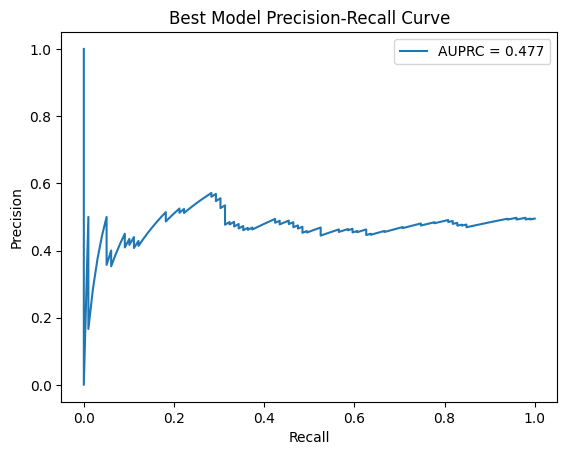

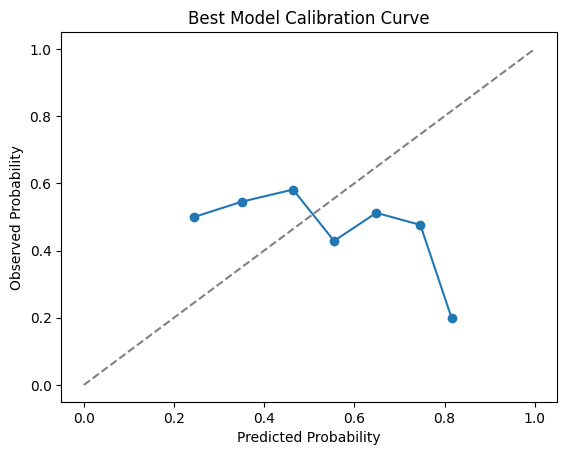

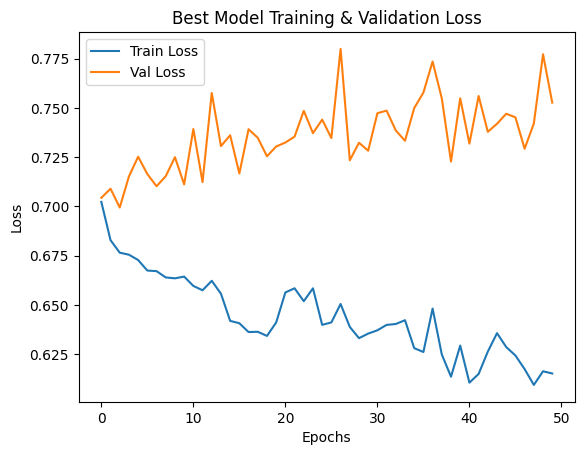

In [31]:
from tensorflow.keras.optimizers import Adam

# 1. Define and compile the LSTM model with best hyperparameters
best_model = Sequential([
    Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(32, return_sequences=False),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

best_model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
best_model.summary()

# 2. Train the model
history_best = best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

# 3. Predictions
y_pred_prob_best = best_model.predict(X_test).ravel()

# 4. Convert to binary class predictions
y_pred_class_best = (y_pred_prob_best > 0.5).astype(int)

# 5. Calculate and print evaluation metrics
if len(np.unique(y_test)) > 1:
    auroc_best = roc_auc_score(y_test, y_pred_prob_best)
    print(f"\nBest Model Evaluation Metrics:")
    print(f"AUROC: {auroc_best:.3f}")
else:
     print("\nBest Model Evaluation Metrics:")
     print("AUROC: Not calculated (only one class in y_test)")

auprc_best = average_precision_score(y_test, y_pred_prob_best)
print(f"AUPRC: {auprc_best:.3f}")


# 6. Confusion Matrix
if len(np.unique(y_test)) > 1:
    cm_best = confusion_matrix(y_test, y_pred_class_best)
    disp_best = ConfusionMatrixDisplay(cm_best, display_labels=["No Deterioration", "Deterioration"])
    disp_best.plot(cmap="Blues")
    plt.title("Best Model Confusion Matrix")
    plt.show()
else:
    print("Best Model Confusion Matrix: Not plotted (only one class in y_test)")

# 7. ROC Curve
if len(np.unique(y_test)) > 1:
    fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_prob_best)
    plt.plot(fpr_best, tpr_best, label=f"AUROC = {auroc_best:.3f}")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Best Model ROC Curve")
    plt.legend()
    plt.show()
else:
    print("Best Model ROC Curve: Not plotted (only one class in y_test)")

# 8. Precision-Recall Curve
precision_best, recall_best, _ = precision_recall_curve(y_test, y_pred_prob_best)
plt.plot(recall_best, precision_best, label=f"AUPRC = {auprc_best:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Best Model Precision-Recall Curve")
plt.legend()
plt.show()

# 9. Calibration Curve
if len(np.unique(y_test)) > 1:
    prob_true_best, prob_pred_best = calibration_curve(y_test, y_pred_prob_best, n_bins=10)
    plt.plot(prob_pred_best, prob_true_best, marker="o")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Observed Probability")
    plt.title("Best Model Calibration Curve")
    plt.show()
else:
    print("Best Model Calibration Curve: Not plotted (only one class in y_test)")


# 10. Training Loss Curve
plt.plot(history_best.history["loss"], label="Train Loss")
plt.plot(history_best.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Best Model Training & Validation Loss")
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

* Class imbalance in the training and testing datasets was assessed and found to be not significant, with the minority class percentage in both datasets exceeding 20%.
* Hyperparameter tuning for the LSTM model revealed that the configuration with 32 LSTM units, a single 32-unit dense layer, a learning rate of 0.001, a batch size of 16, and 50 epochs yielded the best performance (AUROC ~0.537, AUPRC ~0.512) among the tested combinations.
* Exploration of alternative model architectures showed that the initial LSTM model had the highest AUROC (0.568) compared to the GRU (0.534) and 1D CNN (0.468) models. The GRU model, however, achieved a slightly higher AUPRC (0.574) than the initial LSTM (0.551) and significantly outperformed the 1D CNN (0.501) in this metric.
* Re-evaluating the best-performing LSTM model with the identified hyperparameters resulted in an AUROC of 0.462 and an AUPRC of 0.477 on the test set, indicating performance close to random chance and a decrease from the hyperparameter tuning evaluation.

### Insights or Next Steps

* Despite extensive hyperparameter tuning and exploring alternative architectures, the models achieved performance metrics (AUROC/AUPRC) close to random chance, suggesting that the current feature set or model complexity might not be sufficient to capture the underlying patterns for effective classification.
* The discrepancy in performance metrics between the hyperparameter tuning phase and the final re-evaluation of the "best" LSTM model suggests potential instability in the model training or evaluation process. Further investigation into data preprocessing, model architecture, or regularization techniques might be necessary.

Aggregated X_train shape: (500, 11)
Aggregated X_test shape: (200, 11)

--- Training and Evaluating Random Forest ---
Random Forest AUROC: 0.567


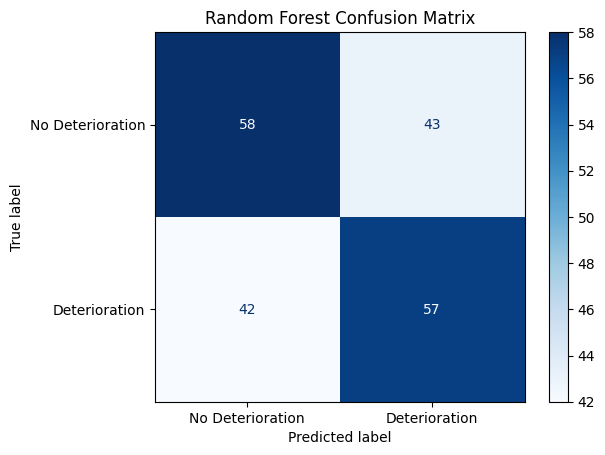

Random Forest AUPRC: 0.567

--- Training and Evaluating XGBoost ---
XGBoost AUROC: 0.577


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:01:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


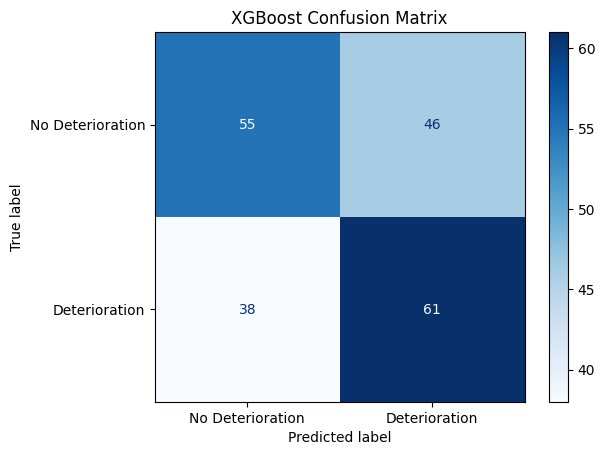

XGBoost AUPRC: 0.558


In [32]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# For traditional ML models, we can use the padded sequences directly, but often
# aggregating features over time works better. Let's try using the mean of the
# features over time for each patient as a simple aggregation.

def aggregate_features(sequences, labels, features):
    aggregated_features = []
    for seq in sequences:
        # Calculate the mean of each feature across the time steps for a patient
        mean_features = np.nanmean(seq, axis=0) # Use nanmean to handle masked values if padding uses NaN
        aggregated_features.append(mean_features)
    return np.array(aggregated_features), labels

# Aggregate features for train and test sets
X_train_agg, y_train_agg = aggregate_features(train_sequences, y_train, features)
X_test_agg, y_test_agg = aggregate_features(test_sequences, y_test, features)

print("Aggregated X_train shape:", X_train_agg.shape)
print("Aggregated X_test shape:", X_test_agg.shape)

# ================================
# Implement and Evaluate Random Forest
# ================================
print("\n--- Training and Evaluating Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_agg, y_train_agg)

y_pred_prob_rf = rf_model.predict_proba(X_test_agg)[:, 1]
y_pred_class_rf = rf_model.predict(X_test_agg)

if len(np.unique(y_test_agg)) > 1:
    auroc_rf = roc_auc_score(y_test_agg, y_pred_prob_rf)
    print(f"Random Forest AUROC: {auroc_rf:.3f}")

    cm_rf = confusion_matrix(y_test_agg, y_pred_class_rf)
    disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels=["No Deterioration", "Deterioration"])
    disp_rf.plot(cmap="Blues")
    plt.title("Random Forest Confusion Matrix")
    plt.show()
else:
    print("Random Forest AUROC: Not calculated (only one class in y_test_agg)")
    print("Random Forest Confusion Matrix: Not plotted (only one class in y_test_agg)")


auprc_rf = average_precision_score(y_test_agg, y_pred_prob_rf)
print(f"Random Forest AUPRC: {auprc_rf:.3f}")


# ================================
# Implement and Evaluate XGBoost
# ================================
print("\n--- Training and Evaluating XGBoost ---")
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_agg, y_train_agg)

y_pred_prob_xgb = xgb_model.predict_proba(X_test_agg)[:, 1]
y_pred_class_xgb = xgb_model.predict(X_test_agg)

if len(np.unique(y_test_agg)) > 1:
    auroc_xgb = roc_auc_score(y_test_agg, y_pred_prob_xgb)
    print(f"XGBoost AUROC: {auroc_xgb:.3f}")

    cm_xgb = confusion_matrix(y_test_agg, y_pred_class_xgb)
    disp_xgb = ConfusionMatrixDisplay(cm_xgb, display_labels=["No Deterioration", "Deterioration"])
    disp_xgb.plot(cmap="Blues")
    plt.title("XGBoost Confusion Matrix")
    plt.show()

else:
    print("XGBoost AUROC: Not calculated (only one class in y_test_agg)")
    print("XGBoost Confusion Matrix: Not plotted (only one class in y_test_agg)")

auprc_xgb = average_precision_score(y_test_agg, y_pred_prob_xgb)
print(f"XGBoost AUPRC: {auprc_xgb:.3f}")

In [33]:
from google.colab import files

# Download the generated CSV files
files.download("synth_train.csv")
files.download("synth_test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>